# **RFGBDT and XGBOOST**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
!pip install chart_studio

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Assignments_DonorsChoose_2018/train_data.csv',nrows=30000)
resource_data = pd.read_csv('/content/drive/My Drive/Assignments_DonorsChoose_2018/resources.csv')

In [7]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (30000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [8]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [0]:
# We need to get rid of The spaces between the text and the hyphens because they're special characters.
#Rmoving multiple characters from a string in Python
#https://stackoverflow.com/questions/3411771/multiple-character-replace-with-python

project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_").replace("-", "_")
    project_grade_category.append(a)

In [12]:
project_data.drop(['project_grade_category'], axis = 1, inplace = True)
project_data["project_grade_category"] = project_grade_category 
print("After removing the special characters ,Column values:  ")
np.unique(project_data["project_grade_category"].values)

After removing the special characters ,Column values:  


array(['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2'],
      dtype=object)

In [0]:
#NaN values in techer prefix will create a problem while encoding,so we replace NaN values with the mode of that particular column
#removing dot(.) since it is a special character
mode_of_teacher_prefix = project_data['teacher_prefix'].value_counts().index[0]


project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(mode_of_teacher_prefix)

In [0]:
prefixes = []

for i in range(len(project_data)):
    a = project_data["teacher_prefix"][i].replace(".", "")
    prefixes.append(a)

In [15]:
project_data.drop(['teacher_prefix'], axis = 1, inplace = True)
project_data["teacher_prefix"] = prefixes
print("After removing the special characters ,Column values:  ")
np.unique(project_data["teacher_prefix"].values)

After removing the special characters ,Column values:  


array(['Mr', 'Mrs', 'Ms', 'Teacher'], dtype=object)

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [18]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [19]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [20]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
#convert all the words to lower case first and then remove the stopwords
for i in range(len(project_data['essay'].values)):
    project_data['essay'].values[i] = project_data['essay'].values[i].lower()
    

In [23]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('nan',' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 30000/30000 [00:13<00:00, 2235.93it/s]


In [0]:
#creating a new column with the preprocessed essays and replacing it with the original columns
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [0]:
essay_word_count=[]
for i in range(len(project_data['preprocessed_essays'])):
    essay_word_count.append(len(project_data['preprocessed_essays'][i].split()))               

In [0]:
project_data['essay_word_count'] = essay_word_count

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
#convert all the words to lower case first and then remove the stopwords
for i in range(len(project_data['project_title'].values)):
    project_data['project_title'].values[i] = project_data['project_title'].values[i].lower()

In [28]:
# similarly you can preprocess the titles also
preprocessed_titles = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('nan',' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 30000/30000 [00:00<00:00, 51017.07it/s]


In [0]:
#creating a new column with the preprocessed titles,useful for analysis
project_data['preprocessed_titles'] = preprocessed_titles

In [0]:
title_word_count=[]
for i in range(len(project_data['preprocessed_titles'])):
    title_word_count.append(len(project_data['preprocessed_titles'][i].split()))   

In [0]:
project_data['title_word_count'] = title_word_count

In [32]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [33]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
neg=[];pos=[];neu=[]; compound = []

for i in tqdm(range(len(project_data['preprocessed_essays']))):
    sentiment_scores = analyzer.polarity_scores(project_data['preprocessed_essays'][i])
    neg.append(sentiment_scores['neg'])
    pos.append(sentiment_scores['pos'])
    neu.append(sentiment_scores['neu'])    
    compound.append(sentiment_scores['compound'])    


100%|██████████| 30000/30000 [00:44<00:00, 678.41it/s]


In [0]:
#new columns indicating the sentiment score of each project essay
project_data['neg'] = neg
project_data['neu'] = neu
project_data['pos'] = pos
project_data['compound'] = compound

<h2> Splitting data into Train and  test: Stratified Sampling</h2>

In [0]:
# train test split

from sklearn.model_selection import train_test_split

project_data_train, project_data_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])

In [36]:
print("Split ratio")
print('-'*50)
print('Train dataset:',len(project_data_train)/len(project_data)*100,'%\n','size:',len(project_data_train))
print('Test dataset:',len(project_data_test)/len(project_data)*100,'%\n','size:',len(project_data_test))

Split ratio
--------------------------------------------------
Train dataset: 67.0 %
 size: 20100
Test dataset: 33.0 %
 size: 9900


In [0]:
#Features
project_data_train.drop(['project_is_approved'], axis=1, inplace=True)

project_data_test.drop(['project_is_approved'], axis=1, inplace=True) 

## 1.5 Preparing data for models

In [38]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'project_grade_category',
       'teacher_prefix', 'essay', 'preprocessed_essays', 'essay_word_count',
       'preprocessed_titles', 'title_word_count', 'neg', 'neu', 'pos',
       'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h2> Make Data Model Ready: vectorizing numerical, categorical features (with response coding) </h2>

<h2>Make Data Model Ready: encoding eassay, and project_title</h2>

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [39]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(min_df=10)
vectorizer_bow_essay.fit(project_data_train['preprocessed_essays'].values)  #Fitting has to be on Train data


train_essay_bow = vectorizer_bow_essay.transform(project_data_train['essay'].values)

test_essay_bow = vectorizer_bow_essay.transform(project_data_test['essay'].values)


print("Shape of train data matrix after one hot encoding ",train_essay_bow.shape)

print("Shape of test data matrix after one hot encoding ",test_essay_bow.shape) 

Shape of train data matrix after one hot encoding  (20100, 8434)
Shape of test data matrix after one hot encoding  (9900, 8434)


In [40]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit_transform(project_data_train['preprocessed_titles'].values)    #Fitting has to be on Train data


train_title_bow = vectorizer_bow_title.transform(project_data_train['preprocessed_titles'].values)

test_title_bow = vectorizer_bow_title.transform(project_data_test['preprocessed_titles'].values)



print("Shape of train data matrix after one hot encoding ",train_title_bow.shape)

print("Shape of test data matrix after one hot encoding ",test_title_bow.shape)

Shape of train data matrix after one hot encoding  (20100, 1063)
Shape of test data matrix after one hot encoding  (9900, 1063)


#### 1.5.2.2 TFIDF vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(project_data_train['preprocessed_essays'])      #Fitting has to be on Train data
 
train_essay_tfidf = vectorizer_tfidf_essay.transform(project_data_train['preprocessed_essays'].values)

test_essay_tfidf = vectorizer_tfidf_essay.transform(project_data_test['preprocessed_essays'].values)

print("Shape of train data matrix after one hot encoding ",train_essay_tfidf.shape)

print("Shape of test data matrix after one hot encoding ",test_essay_tfidf.shape)

Shape of train data matrix after one hot encoding  (20100, 8434)
Shape of test data matrix after one hot encoding  (9900, 8434)


In [42]:
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(project_data_train['preprocessed_titles'])      #Fitting has to be on Train data
 
train_title_tfidf = vectorizer_tfidf_title.transform(project_data_train['preprocessed_titles'].values)

test_title_tfidf = vectorizer_tfidf_title.transform(project_data_test['preprocessed_titles'].values)

print("Shape of train data matrix after one hot encoding ",train_title_tfidf.shape)

print("Shape of test data matrix after one hot encoding ",test_title_tfidf.shape)

Shape of train data matrix after one hot encoding  (20100, 1063)
Shape of test data matrix after one hot encoding  (9900, 1063)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [43]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/Assignments_DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [45]:
# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_essays.append(vector)

print(len(train_avg_w2v_essays))
print(len(train_avg_w2v_essays[0]))

100%|██████████| 20100/20100 [00:04<00:00, 4623.84it/s]

20100
300


In [46]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_essays.append(vector)

print(len(test_avg_w2v_essays))
print(len(test_avg_w2v_essays[0]))

100%|██████████| 9900/9900 [00:02<00:00, 4757.38it/s]

9900
300


In [47]:
# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_titles.append(vector)

print(len(train_avg_w2v_titles))
print(len(train_avg_w2v_titles[0]))

100%|██████████| 20100/20100 [00:00<00:00, 81217.62it/s]

20100
300


In [48]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_titles.append(vector)

print(len(test_avg_w2v_titles))
print(len(test_avg_w2v_titles[0]))

100%|██████████| 9900/9900 [00:00<00:00, 81002.08it/s]

9900
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_train['preprocessed_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [50]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))

100%|██████████| 20100/20100 [00:28<00:00, 711.79it/s]

20100
300


In [51]:
# average Word2Vec
# compute average word2vec for each review.
test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))

100%|██████████| 9900/9900 [00:13<00:00, 714.70it/s]

9900
300


In [0]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_train['preprocessed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [53]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)

print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))

100%|██████████| 20100/20100 [00:00<00:00, 46103.60it/s]

20100
300


In [54]:
# average Word2Vec
# compute average word2vec for each review.
test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)

print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))

100%|██████████| 9900/9900 [00:00<00:00, 42286.93it/s]

9900
300


### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

In [0]:
project_data_train = pd.merge(project_data_train, price_data, on='id', how='left')

project_data_test = pd.merge(project_data_test, price_data, on='id', how='left')

In [57]:
from sklearn.preprocessing import Normalizer
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer = Normalizer()
normalizer.fit(project_data_train['price'].values.reshape(1,-1)) 


price_normalized_train = normalizer.transform(project_data_train['price'].values.reshape(1, -1))

price_normalized_test = normalizer.transform(project_data_test['price'].values.reshape(1, -1))
#reshaping again after normalization

price_normalized_train = price_normalized_train.reshape(-1, 1)
price_normalized_test =  price_normalized_test.reshape(-1, 1)

print('After normalization')
print(price_normalized_train.shape)

print(price_normalized_test.shape)

After normalization
(20100, 1)
(9900, 1)


In [58]:
normalizer = Normalizer()
normalizer.fit(project_data_train['quantity'].values.reshape(1,-1)) 


quantity_normalized_train = normalizer.transform(project_data_train['quantity'].values.reshape(1, -1))

quantity_normalized_test = normalizer.transform(project_data_test['quantity'].values.reshape(1, -1))

#reshaping again after normalization

quantity_normalized_train = quantity_normalized_train.reshape(-1,1)
quantity_normalized_test = quantity_normalized_test.reshape(-1,1)

print('After normalization')
print(quantity_normalized_train.shape)

print(quantity_normalized_test.shape)

After normalization
(20100, 1)
(9900, 1)


In [59]:
normalizer = Normalizer()
normalizer.fit(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) 


previously_posted_projects_normalized_train = normalizer.transform(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

previously_posted_projects_normalized_test = normalizer.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

#reshaping again after normalization

previously_posted_projects_normalized_train = previously_posted_projects_normalized_train.reshape(-1,1)
previously_posted_projects_normalized_test = previously_posted_projects_normalized_test.reshape(-1,1)

print('After normalization')
print(previously_posted_projects_normalized_train.shape)

print(previously_posted_projects_normalized_test.shape)

After normalization
(20100, 1)
(9900, 1)


In [60]:
normalizer = Normalizer()
normalizer.fit(project_data_train['essay_word_count'].values.reshape(-1,1)) 


essay_word_count_normalized_train = normalizer.transform(project_data_train['essay_word_count'].values.reshape(1, -1))

essay_word_count_normalized_test = normalizer.transform(project_data_test['essay_word_count'].values.reshape(1, -1))

#reshaping again after normalization

essay_word_count_normalized_train = essay_word_count_normalized_train.reshape(-1, 1)
essay_word_count_normalized_test = essay_word_count_normalized_test.reshape(-1, 1)

print('After normalization')
print(essay_word_count_normalized_train.shape)

print(essay_word_count_normalized_test.shape)

After normalization
(20100, 1)
(9900, 1)


In [61]:
normalizer = Normalizer()
normalizer.fit(project_data_train['title_word_count'].values.reshape(-1,1)) 


title_word_count_normalized_train = normalizer.transform(project_data_train['title_word_count'].values.reshape(1, -1))

title_word_count_normalized_test = normalizer.transform(project_data_test['title_word_count'].values.reshape(1, -1))

#reshaping again after normalization

title_word_count_normalized_train = title_word_count_normalized_train.reshape(-1, 1)
title_word_count_normalized_test = title_word_count_normalized_test.reshape(-1, 1)




print('After normalization')
print(title_word_count_normalized_train.shape)

print(title_word_count_normalized_test.shape)

After normalization
(20100, 1)
(9900, 1)


In [62]:
normalizer = Normalizer()
normalizer.fit(project_data_train['neg'].values.reshape(-1,1)) 


sent_neg_train = normalizer.transform(project_data_train['neg'].values.reshape(1, -1))

sent_neg_test = normalizer.transform(project_data_test['neg'].values.reshape(1, -1))

#reshaping again after normalization
sent_neg_train = sent_neg_train.reshape(-1,1)
sent_neg_test = sent_neg_test.reshape(-1,1)



print('After normalization')
print(sent_neg_train.shape)

print(sent_neg_test.shape)

After normalization
(20100, 1)
(9900, 1)


In [63]:
normalizer = Normalizer()
normalizer.fit(project_data_train['pos'].values.reshape(-1,1)) 


sent_pos_train = normalizer.transform(project_data_train['pos'].values.reshape(1, -1))

sent_pos_test = normalizer.transform(project_data_test['pos'].values.reshape(1, -1))

#reshaping again after normalization
sent_pos_train = sent_pos_train.reshape(-1,1)
sent_pos_test = sent_pos_test.reshape(-1,1)



print('After normalization')

print(sent_pos_train.shape)

print(sent_pos_test.shape)

After normalization
(20100, 1)
(9900, 1)


In [64]:
normalizer = Normalizer()
normalizer.fit(project_data_train['neu'].values.reshape(-1,1)) 


sent_neu_train = normalizer.transform(project_data_train['neu'].values.reshape(1, -1))

sent_neu_test = normalizer.transform(project_data_test['neu'].values.reshape(1, -1))

#reshaping again after normalization
sent_neu_train = sent_neu_train.reshape(-1,1)
sent_neu_test = sent_neu_test.reshape(-1,1)


print('After normalization')
print(sent_neu_train.shape)

print(sent_neu_test.shape)

After normalization
(20100, 1)
(9900, 1)


In [65]:
normalizer = Normalizer()
normalizer.fit(project_data_train['compound'].values.reshape(-1,1)) 


sent_compound_train = normalizer.transform(project_data_train['compound'].values.reshape(1, -1))

sent_compound_test = normalizer.transform(project_data_test['compound'].values.reshape(1, -1))


#reshaping again after normalization
sent_compound_train = sent_compound_train.reshape(-1,1)
sent_compound_test = sent_compound_test.reshape(-1,1)


print('After normalization')
print(sent_compound_train.shape)

print(sent_compound_test.shape)

After normalization
(20100, 1)
(9900, 1)


## Response coding for Categorical Data

In [0]:
#https://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining
def mask(df, key, value):
    return df[df[key] == value]

def get_response(data,data_label):
    cat_values = np.unique(data).tolist()
    df = pd.DataFrame({'feature':data.values.tolist(),'label':data_label.values.tolist()})
    pd.DataFrame.mask = mask
    
    accep = {};reject={};prob_neg = {};prob_pos={}
    for i in cat_values:
        count_0 = len(df.mask('feature', i).mask('label', 0))
        count_1 = len(df.mask('feature', i).mask('label', 1))
        total   =   count_0 + count_1
        prob_0 = count_0/total
        prob_1 = count_1/total
        accep[i] = count_1
        reject[i] = count_0
        prob_neg[i] = prob_0
        prob_pos[i] = prob_1
        
    return prob_neg,prob_pos    

In [0]:
cat_0_train = get_response(project_data_train['clean_categories'],y_train)[0]
cat_1_train = get_response(project_data_train['clean_categories'],y_train)[1]

In [0]:
subcat_0_train = get_response(project_data_train['clean_subcategories'],y_train)[0]
subcat_1_train = get_response(project_data_train['clean_subcategories'],y_train)[1]

In [0]:
state_0_train = get_response(project_data_train['school_state'],y_train)[0]
state_1_train = get_response(project_data_train['school_state'],y_train)[1]

In [0]:
prefix_0_train = get_response(project_data_train['teacher_prefix'],y_train)[0]
prefix_1_train = get_response(project_data_train['teacher_prefix'],y_train)[1]

In [0]:
grad_cat_0_train = get_response(project_data_train['project_grade_category'],y_train)[0]
grad_cat_1_train = get_response(project_data_train['project_grade_category'],y_train)[1]

In [0]:
cat_0_test = get_response(project_data_test['clean_categories'],y_test)[0]
cat_1_test = get_response(project_data_test['clean_categories'],y_test)[1]

In [0]:
subcat_0_test = get_response(project_data_test['clean_subcategories'],y_test)[0]
subcat_1_test = get_response(project_data_test['clean_subcategories'],y_test)[1]

In [0]:
state_0_test = get_response(project_data_test['school_state'],y_test)[0]
state_1_test = get_response(project_data_test['school_state'],y_test)[1]

In [0]:
prefix_0_test = get_response(project_data_test['teacher_prefix'],y_test)[0]
prefix_1_test = get_response(project_data_test['teacher_prefix'],y_test)[1]

In [0]:
grad_cat_0_test = get_response(project_data_test['project_grade_category'],y_test)[0]
grad_cat_1_test = get_response(project_data_test['project_grade_category'],y_test)[1]

In [77]:
cat_0_train


{'AppliedLearning': 0.17590027700831026,
 'AppliedLearning Health_Sports': 0.16326530612244897,
 'AppliedLearning History_Civics': 0.23076923076923078,
 'AppliedLearning Literacy_Language': 0.14354066985645933,
 'AppliedLearning Math_Science': 0.1891891891891892,
 'AppliedLearning Music_Arts': 0.1958041958041958,
 'AppliedLearning SpecialNeeds': 0.16923076923076924,
 'AppliedLearning Warmth Care_Hunger': 0.0,
 'Health_Sports': 0.15204981837052414,
 'Health_Sports AppliedLearning': 0.21153846153846154,
 'Health_Sports History_Civics': 0.0,
 'Health_Sports Literacy_Language': 0.1736111111111111,
 'Health_Sports Math_Science': 0.125,
 'Health_Sports Music_Arts': 0.3448275862068966,
 'Health_Sports SpecialNeeds': 0.14516129032258066,
 'Health_Sports Warmth Care_Hunger': 0.16666666666666666,
 'History_Civics': 0.15542521994134897,
 'History_Civics AppliedLearning': 0.13333333333333333,
 'History_Civics Health_Sports': 0.0,
 'History_Civics Literacy_Language': 0.09195402298850575,
 'History_

In [78]:
cat_1_train

{'AppliedLearning': 0.8240997229916898,
 'AppliedLearning Health_Sports': 0.8367346938775511,
 'AppliedLearning History_Civics': 0.7692307692307693,
 'AppliedLearning Literacy_Language': 0.8564593301435407,
 'AppliedLearning Math_Science': 0.8108108108108109,
 'AppliedLearning Music_Arts': 0.8041958041958042,
 'AppliedLearning SpecialNeeds': 0.8307692307692308,
 'AppliedLearning Warmth Care_Hunger': 1.0,
 'Health_Sports': 0.8479501816294759,
 'Health_Sports AppliedLearning': 0.7884615384615384,
 'Health_Sports History_Civics': 1.0,
 'Health_Sports Literacy_Language': 0.8263888888888888,
 'Health_Sports Math_Science': 0.875,
 'Health_Sports Music_Arts': 0.6551724137931034,
 'Health_Sports SpecialNeeds': 0.8548387096774194,
 'Health_Sports Warmth Care_Hunger': 0.8333333333333334,
 'History_Civics': 0.844574780058651,
 'History_Civics AppliedLearning': 0.8666666666666667,
 'History_Civics Health_Sports': 1.0,
 'History_Civics Literacy_Language': 0.9080459770114943,
 'History_Civics Math_S

In [0]:
cat_neg_train = []
cat_pos_train = []
for i in project_data_train['clean_categories']:
    cat_neg_train.append(cat_0_train[i])
    cat_pos_train.append(cat_1_train[i])
project_data_train['cat_0'] = cat_neg_train
project_data_train['cat_1'] = cat_pos_train


In [80]:
subcat_0_train

{'AppliedSciences': 0.18816067653276955,
 'AppliedSciences CharacterEducation': 0.5,
 'AppliedSciences Civics_Government': 0.0,
 'AppliedSciences College_CareerPrep': 0.18181818181818182,
 'AppliedSciences CommunityService': 0.0,
 'AppliedSciences ESL': 0.05555555555555555,
 'AppliedSciences EarlyDevelopment': 0.05714285714285714,
 'AppliedSciences Economics': 1.0,
 'AppliedSciences EnvironmentalScience': 0.2023121387283237,
 'AppliedSciences Extracurricular': 0.0,
 'AppliedSciences FinancialLiteracy': 1.0,
 'AppliedSciences Gym_Fitness': 0.5,
 'AppliedSciences Health_LifeScience': 0.16346153846153846,
 'AppliedSciences Health_Wellness': 0.0,
 'AppliedSciences History_Geography': 0.23529411764705882,
 'AppliedSciences Literacy': 0.1111111111111111,
 'AppliedSciences Literature_Writing': 0.10810810810810811,
 'AppliedSciences Mathematics': 0.1637239165329053,
 'AppliedSciences Music': 0.14285714285714285,
 'AppliedSciences NutritionEducation': 0.0,
 'AppliedSciences Other': 0.2380952380

In [81]:
subcat_1_train 

{'AppliedSciences': 0.8118393234672304,
 'AppliedSciences CharacterEducation': 0.5,
 'AppliedSciences Civics_Government': 1.0,
 'AppliedSciences College_CareerPrep': 0.8181818181818182,
 'AppliedSciences CommunityService': 1.0,
 'AppliedSciences ESL': 0.9444444444444444,
 'AppliedSciences EarlyDevelopment': 0.9428571428571428,
 'AppliedSciences Economics': 0.0,
 'AppliedSciences EnvironmentalScience': 0.7976878612716763,
 'AppliedSciences Extracurricular': 1.0,
 'AppliedSciences FinancialLiteracy': 0.0,
 'AppliedSciences Gym_Fitness': 0.5,
 'AppliedSciences Health_LifeScience': 0.8365384615384616,
 'AppliedSciences Health_Wellness': 1.0,
 'AppliedSciences History_Geography': 0.7647058823529411,
 'AppliedSciences Literacy': 0.8888888888888888,
 'AppliedSciences Literature_Writing': 0.8918918918918919,
 'AppliedSciences Mathematics': 0.8362760834670947,
 'AppliedSciences Music': 0.8571428571428571,
 'AppliedSciences NutritionEducation': 1.0,
 'AppliedSciences Other': 0.7619047619047619,


In [0]:
subcat_neg_train = []
subcat_pos_train = []
for i in project_data_train['clean_subcategories']:
    subcat_neg_train.append(subcat_0_train[i])
    subcat_pos_train.append(subcat_1_train[i])
project_data_train['subcat_0'] = subcat_neg_train
project_data_train['subcat_1'] = subcat_pos_train    

In [83]:
state_0_train 


{'AK': 0.20833333333333334,
 'AL': 0.125,
 'AR': 0.20238095238095238,
 'AZ': 0.16279069767441862,
 'CA': 0.14130434782608695,
 'CO': 0.18041237113402062,
 'CT': 0.10869565217391304,
 'DC': 0.24468085106382978,
 'DE': 0.08196721311475409,
 'FL': 0.17353951890034364,
 'GA': 0.14545454545454545,
 'HI': 0.13953488372093023,
 'IA': 0.18110236220472442,
 'ID': 0.18803418803418803,
 'IL': 0.16030534351145037,
 'IN': 0.14870689655172414,
 'KS': 0.12612612612612611,
 'KY': 0.11016949152542373,
 'LA': 0.17218543046357615,
 'MA': 0.14814814814814814,
 'MD': 0.15789473684210525,
 'ME': 0.1827956989247312,
 'MI': 0.16850393700787403,
 'MN': 0.13488372093023257,
 'MO': 0.13219616204690832,
 'MS': 0.18376068376068377,
 'MT': 0.3111111111111111,
 'NC': 0.14093264248704662,
 'ND': 0.12,
 'NE': 0.12280701754385964,
 'NH': 0.13793103448275862,
 'NJ': 0.17215189873417722,
 'NM': 0.12359550561797752,
 'NV': 0.14942528735632185,
 'NY': 0.13882863340563992,
 'OH': 0.1326530612244898,
 'OK': 0.16,
 'OR': 0.20

In [84]:
state_1_train

{'AK': 0.7916666666666666,
 'AL': 0.875,
 'AR': 0.7976190476190477,
 'AZ': 0.8372093023255814,
 'CA': 0.8586956521739131,
 'CO': 0.8195876288659794,
 'CT': 0.8913043478260869,
 'DC': 0.7553191489361702,
 'DE': 0.9180327868852459,
 'FL': 0.8264604810996563,
 'GA': 0.8545454545454545,
 'HI': 0.8604651162790697,
 'IA': 0.8188976377952756,
 'ID': 0.811965811965812,
 'IL': 0.8396946564885496,
 'IN': 0.8512931034482759,
 'KS': 0.8738738738738738,
 'KY': 0.8898305084745762,
 'LA': 0.8278145695364238,
 'MA': 0.8518518518518519,
 'MD': 0.8421052631578947,
 'ME': 0.8172043010752689,
 'MI': 0.831496062992126,
 'MN': 0.8651162790697674,
 'MO': 0.8678038379530917,
 'MS': 0.8162393162393162,
 'MT': 0.6888888888888889,
 'NC': 0.8590673575129534,
 'ND': 0.88,
 'NE': 0.8771929824561403,
 'NH': 0.8620689655172413,
 'NJ': 0.8278481012658228,
 'NM': 0.8764044943820225,
 'NV': 0.8505747126436781,
 'NY': 0.8611713665943601,
 'OH': 0.8673469387755102,
 'OK': 0.84,
 'OR': 0.7911111111111111,
 'PA': 0.84455958

In [0]:
state_neg_train = []
state_pos_train = []
for i in project_data_train['school_state']:
    state_neg_train.append(state_0_train[i])
    state_pos_train.append(state_1_train[i])
project_data_train['state_0'] = state_neg_train
project_data_train['state_1'] = state_pos_train    

In [86]:
prefix_0_train

{'Mr': 0.15717884130982368,
 'Mrs': 0.15088757396449703,
 'Ms': 0.15403795539548415,
 'Teacher': 0.215311004784689}

In [87]:
prefix_1_train

{'Mr': 0.8428211586901764,
 'Mrs': 0.849112426035503,
 'Ms': 0.8459620446045159,
 'Teacher': 0.784688995215311}

In [0]:
prefix_neg_train = []
prefix_pos_train = []
for i in project_data_train['teacher_prefix']:
    prefix_neg_train.append(prefix_0_train[i])
    prefix_pos_train.append(prefix_1_train[i])
project_data_train['prefix_0'] = prefix_neg_train
project_data_train['prefix_1'] = prefix_pos_train   

In [89]:
grad_cat_0_train

{'Grades_3_5': 0.14500886001181335,
 'Grades_6_8': 0.1611978337050016,
 'Grades_9_12': 0.16675037669512807,
 'Grades_PreK_2': 0.15552573798487435}

In [90]:
grad_cat_1_train

{'Grades_3_5': 0.8549911399881867,
 'Grades_6_8': 0.8388021662949984,
 'Grades_9_12': 0.833249623304872,
 'Grades_PreK_2': 0.8444742620151257}

In [0]:
grade_neg_train = []
grade_pos_train = []
for i in project_data_train['project_grade_category']:
    grade_neg_train.append(grad_cat_0_train[i])
    grade_pos_train.append(grad_cat_1_train[i])
project_data_train['grade_0'] = grade_neg_train
project_data_train['grade_1'] = grade_pos_train  

In [92]:
project_data_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'project_grade_category', 'teacher_prefix',
       'essay', 'preprocessed_essays', 'essay_word_count',
       'preprocessed_titles', 'title_word_count', 'neg', 'neu', 'pos',
       'compound', 'price', 'quantity', 'cat_0', 'cat_1', 'subcat_0',
       'subcat_1', 'state_0', 'state_1', 'prefix_0', 'prefix_1', 'grade_0',
       'grade_1'],
      dtype='object')

In [93]:
project_data_train.head()

Unnamed: 0       id  ...   grade_0   grade_1
0      122998  p144458  ...  0.155526  0.844474
1      133953  p034064  ...  0.145009  0.854991
2      116200  p186620  ...  0.155526  0.844474
3      100801  p103335  ...  0.145009  0.854991
4       10536  p204652  ...  0.161198  0.838802

[5 rows x 33 columns]

In [94]:
cat_0_test

{'AppliedLearning': 0.20057306590257878,
 'AppliedLearning Health_Sports': 0.18518518518518517,
 'AppliedLearning History_Civics': 0.25,
 'AppliedLearning Literacy_Language': 0.1650485436893204,
 'AppliedLearning Math_Science': 0.16666666666666666,
 'AppliedLearning Music_Arts': 0.21518987341772153,
 'AppliedLearning SpecialNeeds': 0.2,
 'AppliedLearning Warmth Care_Hunger': 1.0,
 'Health_Sports': 0.16228070175438597,
 'Health_Sports AppliedLearning': 0.0,
 'Health_Sports History_Civics': 0.0,
 'Health_Sports Literacy_Language': 0.19230769230769232,
 'Health_Sports Math_Science': 0.22727272727272727,
 'Health_Sports Music_Arts': 0.2,
 'Health_Sports SpecialNeeds': 0.19230769230769232,
 'History_Civics': 0.189873417721519,
 'History_Civics AppliedLearning': 0.5,
 'History_Civics Literacy_Language': 0.056,
 'History_Civics Math_Science': 0.14285714285714285,
 'History_Civics Music_Arts': 0.13793103448275862,
 'History_Civics SpecialNeeds': 0.22727272727272727,
 'Literacy_Language': 0.131

In [95]:
cat_1_test

{'AppliedLearning': 0.7994269340974212,
 'AppliedLearning Health_Sports': 0.8148148148148148,
 'AppliedLearning History_Civics': 0.75,
 'AppliedLearning Literacy_Language': 0.8349514563106796,
 'AppliedLearning Math_Science': 0.8333333333333334,
 'AppliedLearning Music_Arts': 0.7848101265822784,
 'AppliedLearning SpecialNeeds': 0.8,
 'AppliedLearning Warmth Care_Hunger': 0.0,
 'Health_Sports': 0.8377192982456141,
 'Health_Sports AppliedLearning': 1.0,
 'Health_Sports History_Civics': 1.0,
 'Health_Sports Literacy_Language': 0.8076923076923077,
 'Health_Sports Math_Science': 0.7727272727272727,
 'Health_Sports Music_Arts': 0.8,
 'Health_Sports SpecialNeeds': 0.8076923076923077,
 'History_Civics': 0.810126582278481,
 'History_Civics AppliedLearning': 0.5,
 'History_Civics Literacy_Language': 0.944,
 'History_Civics Math_Science': 0.8571428571428571,
 'History_Civics Music_Arts': 0.8620689655172413,
 'History_Civics SpecialNeeds': 0.7727272727272727,
 'Literacy_Language': 0.86864988558352

In [0]:
cat_neg_test = []
cat_pos_test = []
for i in project_data_test['clean_categories']:
    cat_neg_test.append(cat_0_test[i])
    cat_pos_test.append(cat_1_test[i])
project_data_test['cat_0'] = cat_neg_test
project_data_test['cat_1'] = cat_pos_test

In [97]:
subcat_0_test

{'AppliedSciences': 0.15625,
 'AppliedSciences CharacterEducation': 0.25,
 'AppliedSciences Civics_Government': 0.0,
 'AppliedSciences College_CareerPrep': 0.1590909090909091,
 'AppliedSciences CommunityService': 0.0,
 'AppliedSciences ESL': 0.375,
 'AppliedSciences EarlyDevelopment': 0.23076923076923078,
 'AppliedSciences EnvironmentalScience': 0.18292682926829268,
 'AppliedSciences Extracurricular': 0.21428571428571427,
 'AppliedSciences ForeignLanguages': 0.5,
 'AppliedSciences Health_LifeScience': 0.17777777777777778,
 'AppliedSciences Health_Wellness': 0.5,
 'AppliedSciences History_Geography': 0.25,
 'AppliedSciences Literacy': 0.18867924528301888,
 'AppliedSciences Literature_Writing': 0.10810810810810811,
 'AppliedSciences Mathematics': 0.17307692307692307,
 'AppliedSciences Music': 0.0,
 'AppliedSciences Other': 0.16666666666666666,
 'AppliedSciences ParentInvolvement': 0.16666666666666666,
 'AppliedSciences PerformingArts': 0.0,
 'AppliedSciences SocialSciences': 0.1666666666

In [98]:
subcat_1_test

{'AppliedSciences': 0.84375,
 'AppliedSciences CharacterEducation': 0.75,
 'AppliedSciences Civics_Government': 1.0,
 'AppliedSciences College_CareerPrep': 0.8409090909090909,
 'AppliedSciences CommunityService': 1.0,
 'AppliedSciences ESL': 0.625,
 'AppliedSciences EarlyDevelopment': 0.7692307692307693,
 'AppliedSciences EnvironmentalScience': 0.8170731707317073,
 'AppliedSciences Extracurricular': 0.7857142857142857,
 'AppliedSciences ForeignLanguages': 0.5,
 'AppliedSciences Health_LifeScience': 0.8222222222222222,
 'AppliedSciences Health_Wellness': 0.5,
 'AppliedSciences History_Geography': 0.75,
 'AppliedSciences Literacy': 0.8113207547169812,
 'AppliedSciences Literature_Writing': 0.8918918918918919,
 'AppliedSciences Mathematics': 0.8269230769230769,
 'AppliedSciences Music': 1.0,
 'AppliedSciences Other': 0.8333333333333334,
 'AppliedSciences ParentInvolvement': 0.8333333333333334,
 'AppliedSciences PerformingArts': 1.0,
 'AppliedSciences SocialSciences': 0.8333333333333334,
 

In [0]:
subcat_neg_test = []
subcat_pos_test = []
for i in project_data_test['clean_subcategories']:
    subcat_neg_test.append(subcat_0_test[i])
    subcat_pos_test.append(subcat_1_test[i])
project_data_test['subcat_0'] = subcat_neg_test
project_data_test['subcat_1'] = subcat_pos_test    

In [100]:
state_0_test

{'AK': 0.16666666666666666,
 'AL': 0.1497005988023952,
 'AR': 0.1744186046511628,
 'AZ': 0.14347826086956522,
 'CA': 0.14559386973180077,
 'CO': 0.13559322033898305,
 'CT': 0.14965986394557823,
 'DC': 0.18867924528301888,
 'DE': 0.11764705882352941,
 'FL': 0.17391304347826086,
 'GA': 0.17204301075268819,
 'HI': 0.18518518518518517,
 'IA': 0.09433962264150944,
 'ID': 0.20833333333333334,
 'IL': 0.1597051597051597,
 'IN': 0.17054263565891473,
 'KS': 0.12121212121212122,
 'KY': 0.13761467889908258,
 'LA': 0.13615023474178403,
 'MA': 0.13924050632911392,
 'MD': 0.15037593984962405,
 'ME': 0.15384615384615385,
 'MI': 0.15037593984962405,
 'MN': 0.136,
 'MO': 0.16055045871559634,
 'MS': 0.15315315315315314,
 'MT': 0.2,
 'NC': 0.16488222698072805,
 'ND': 0.125,
 'NE': 0.24324324324324326,
 'NH': 0.06666666666666667,
 'NJ': 0.18604651162790697,
 'NM': 0.09433962264150944,
 'NV': 0.171875,
 'NY': 0.15030674846625766,
 'OH': 0.13524590163934427,
 'OK': 0.14691943127962084,
 'OR': 0.1893939393939

In [101]:
state_1_test

{'AK': 0.8333333333333334,
 'AL': 0.8502994011976048,
 'AR': 0.8255813953488372,
 'AZ': 0.8565217391304348,
 'CA': 0.8544061302681992,
 'CO': 0.864406779661017,
 'CT': 0.8503401360544217,
 'DC': 0.8113207547169812,
 'DE': 0.8823529411764706,
 'FL': 0.8260869565217391,
 'GA': 0.8279569892473119,
 'HI': 0.8148148148148148,
 'IA': 0.9056603773584906,
 'ID': 0.7916666666666666,
 'IL': 0.8402948402948403,
 'IN': 0.8294573643410853,
 'KS': 0.8787878787878788,
 'KY': 0.8623853211009175,
 'LA': 0.863849765258216,
 'MA': 0.8607594936708861,
 'MD': 0.849624060150376,
 'ME': 0.8461538461538461,
 'MI': 0.849624060150376,
 'MN': 0.864,
 'MO': 0.8394495412844036,
 'MS': 0.8468468468468469,
 'MT': 0.8,
 'NC': 0.8351177730192719,
 'ND': 0.875,
 'NE': 0.7567567567567568,
 'NH': 0.9333333333333333,
 'NJ': 0.813953488372093,
 'NM': 0.9056603773584906,
 'NV': 0.828125,
 'NY': 0.8496932515337423,
 'OH': 0.8647540983606558,
 'OK': 0.8530805687203792,
 'OR': 0.8106060606060606,
 'PA': 0.8536585365853658,
 'R

In [0]:
state_neg_test = []
state_pos_test = []
for i in project_data_test['school_state']:
    state_neg_test.append(state_0_test[i])
    state_pos_test.append(state_1_test[i])
project_data_test['state_0'] = state_neg_test
project_data_test['state_1'] = state_pos_test    

In [103]:
prefix_0_test

{'Mr': 0.13846153846153847,
 'Mrs': 0.15196926032660904,
 'Ms': 0.15955056179775282,
 'Teacher': 0.17777777777777778}

In [104]:
prefix_1_test

{'Mr': 0.8615384615384616,
 'Mrs': 0.8480307396733909,
 'Ms': 0.8404494382022472,
 'Teacher': 0.8222222222222222}

In [0]:
prefix_neg_test = []
prefix_pos_test = []
for i in project_data_test['teacher_prefix']:
    prefix_neg_test.append(prefix_0_test[i])
    prefix_pos_test.append(prefix_1_test[i])
project_data_test['prefix_0'] = prefix_neg_test
project_data_test['prefix_1'] = prefix_pos_test  

In [106]:
grad_cat_0_test

{'Grades_3_5': 0.15200708382526565,
 'Grades_6_8': 0.17060367454068243,
 'Grades_9_12': 0.14765784114052954,
 'Grades_PreK_2': 0.1510234648027958}

In [107]:
grad_cat_1_test

{'Grades_3_5': 0.8479929161747344,
 'Grades_6_8': 0.8293963254593176,
 'Grades_9_12': 0.8523421588594705,
 'Grades_PreK_2': 0.8489765351972042}

In [0]:
grade_neg_test = []
grade_pos_test = []
for i in project_data_test['project_grade_category']:
    grade_neg_test.append(grad_cat_0_test[i])
    grade_pos_test.append(grad_cat_1_test[i])
project_data_test['grade_0'] = grade_neg_test
project_data_test['grade_1'] = grade_pos_test 

In [109]:
project_data_test.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'project_grade_category', 'teacher_prefix',
       'essay', 'preprocessed_essays', 'essay_word_count',
       'preprocessed_titles', 'title_word_count', 'neg', 'neu', 'pos',
       'compound', 'price', 'quantity', 'cat_0', 'cat_1', 'subcat_0',
       'subcat_1', 'state_0', 'state_1', 'prefix_0', 'prefix_1', 'grade_0',
       'grade_1'],
      dtype='object')

In [110]:
project_data_test.head()

Unnamed: 0       id  ...   grade_0   grade_1
0      121419  p142157  ...  0.152007  0.847993
1      155129  p157153  ...  0.170604  0.829396
2      165704  p046037  ...  0.151023  0.848977
3       83501  p017261  ...  0.151023  0.848977
4       39939  p030597  ...  0.151023  0.848977

[5 rows x 33 columns]

In [111]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(project_data_train["cat_0"].values.reshape(-1,1))  #fit has to be done only on Train data

cat_0_train_normalized = normalizer.transform(project_data_train["cat_0"].values.reshape(1,-1))
cat_0_test_normalized = normalizer.transform(project_data_test["cat_0"].values.reshape(1,-1))

#reshaping after normalizing 
cat_0_train_normalized = cat_0_train_normalized.reshape(-1,1)
cat_0_test_normalized = cat_0_test_normalized.reshape(-1,1)

print("After vectorizations")
print(cat_0_train_normalized.shape, y_train.shape)
print(cat_0_test_normalized.shape, y_test.shape)


After vectorizations
(20100, 1) (20100,)
(9900, 1) (9900,)


In [112]:
cat_0_train_normalized

array([[0.00599631],
       [0.00811779],
       [0.00923005],
       ...,
       [0.00811779],
       [0.00811779],
       [0.00598429]])

In [113]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(project_data_train["cat_1"].values.reshape(-1,1))   #fit has to be done only on Train data

cat_1_train_normalized = normalizer.transform(project_data_train["cat_1"].values.reshape(1,-1))
cat_1_test_normalized = normalizer.transform(project_data_test["cat_1"].values.reshape(1,-1))


#reshaping after normalizing 
cat_1_train_normalized = cat_1_train_normalized.reshape(-1,1)
cat_1_test_normalized = cat_1_test_normalized.reshape(-1,1)

print("After vectorizations")
print(cat_1_train_normalized.shape, y_train.shape)
print(cat_1_test_normalized.shape, y_test.shape)


After vectorizations
(20100, 1) (20100,)
(9900, 1) (9900,)


In [114]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(project_data_train["subcat_0"].values.reshape(-1,1))  #fit has to be done only on Train data

subcat_0_train_normalized = normalizer.transform(project_data_train["subcat_0"].values.reshape(1,-1))
subcat_0_test_normalized = normalizer.transform(project_data_test["subcat_0"].values.reshape(1,-1))

#reshaping after normalizing 
subcat_0_train_normalized = subcat_0_train_normalized.reshape(-1,1)
subcat_0_test_normalized = subcat_0_test_normalized.reshape(-1,1)



print("After vectorizations")
print(subcat_0_train_normalized.shape, y_train.shape)
print(subcat_0_test_normalized.shape, y_test.shape)


After vectorizations
(20100, 1) (20100,)
(9900, 1) (9900,)


In [115]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(project_data_train["subcat_1"].values.reshape(-1,1))  #fit has to be done only on Train data

subcat_1_train_normalized = normalizer.transform(project_data_train["subcat_1"].values.reshape(1,-1))
subcat_1_test_normalized = normalizer.transform(project_data_test["subcat_1"].values.reshape(1,-1))


#reshaping after normalizing 
subcat_1_train_normalized = subcat_1_train_normalized.reshape(-1,1)
subcat_1_test_normalized = subcat_1_test_normalized.reshape(-1,1)

print("After vectorizations")
print(subcat_1_train_normalized.shape, y_train.shape)
print(subcat_1_test_normalized.shape, y_test.shape)


After vectorizations
(20100, 1) (20100,)
(9900, 1) (9900,)


In [116]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(project_data_train["state_0"].values.reshape(-1,1))  #fit has to be done only on Train data

state_0_train_normalized = normalizer.transform(project_data_train["state_0"].values.reshape(1,-1))
state_0_test_normalized = normalizer.transform(project_data_test["state_0"].values.reshape(1,-1))

#reshaping after normalizing
state_0_train_normalized = state_0_train_normalized.reshape(-1,1)
state_0_test_normalized = state_0_test_normalized.reshape(-1,1)

print("After vectorizations")
print(state_0_train_normalized.shape, y_train.shape)
print(state_0_test_normalized.shape, y_test.shape)


After vectorizations
(20100, 1) (20100,)
(9900, 1) (9900,)


In [117]:

from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(project_data_train["state_1"].values.reshape(-1,1))  #fit has to be done only on Train data

state_1_train_normalized = normalizer.transform(project_data_train["state_1"].values.reshape(1,-1))
state_1_test_normalized = normalizer.transform(project_data_test["state_1"].values.reshape(1,-1))


#reshaping after normalizing
state_1_train_normalized = state_1_train_normalized.reshape(-1,1)
state_1_test_normalized = state_1_test_normalized.reshape(-1,1)

print("After vectorizations")
print(state_1_train_normalized.shape, y_train.shape)
print(state_1_test_normalized.shape, y_test.shape)


After vectorizations
(20100, 1) (20100,)
(9900, 1) (9900,)


In [118]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(project_data_train["prefix_0"].values.reshape(-1,1))  #fit has to be done only on Train data

prefix_0_train_normalized = normalizer.transform(project_data_train["prefix_0"].values.reshape(1,-1))
prefix_0_test_normalized = normalizer.transform(project_data_test["prefix_0"].values.reshape(1,-1))

#reshaping after normalizing
prefix_0_train_normalized = prefix_0_train_normalized.reshape(-1,1)
prefix_0_test_normalized = prefix_0_test_normalized.reshape(-1,1)

print("After vectorizations")
print(prefix_0_train_normalized.shape, y_train.shape)
print(prefix_0_test_normalized.shape, y_test.shape)


After vectorizations
(20100, 1) (20100,)
(9900, 1) (9900,)


In [119]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(project_data_train["prefix_1"].values.reshape(-1,1))  #fit has to be done only on Train data

prefix_1_train_normalized = normalizer.transform(project_data_train["prefix_1"].values.reshape(1,-1))
prefix_1_test_normalized = normalizer.transform(project_data_test["prefix_1"].values.reshape(1,-1))


#reshaping after normalizing
prefix_1_train_normalized = prefix_1_train_normalized.reshape(-1,1)
prefix_1_test_normalized = prefix_1_test_normalized.reshape(-1,1)


print("After vectorizations")
print(prefix_1_train_normalized.shape, y_train.shape)
print(prefix_1_test_normalized.shape, y_test.shape)


After vectorizations
(20100, 1) (20100,)
(9900, 1) (9900,)


In [120]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(project_data_train["grade_0"].values.reshape(-1,1))  #fit has to be done only on Train data

grade_0_train_normalized = normalizer.transform(project_data_train["grade_0"].values.reshape(1,-1))
grade_0_test_normalized = normalizer.transform(project_data_test["grade_0"].values.reshape(1,-1))

#reshaping after normalizing
grade_0_train_normalized = grade_0_train_normalized.reshape(-1,1)
grade_0_test_normalized = grade_0_test_normalized.reshape(-1,1)




print("After vectorizations")
print(grade_0_train_normalized.shape, y_train.shape)
print(grade_0_test_normalized.shape, y_test.shape)


After vectorizations
(20100, 1) (20100,)
(9900, 1) (9900,)


In [121]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(project_data_train["grade_1"].values.reshape(-1,1))  #fit has to be done only on Train data

grade_1_train_normalized = normalizer.transform(project_data_train["grade_1"].values.reshape(1,-1))
grade_1_test_normalized = normalizer.transform(project_data_test["grade_1"].values.reshape(1,-1))


#reshaping after normalizing
grade_1_train_normalized = grade_1_train_normalized.reshape(-1,1)
grade_1_test_normalized = grade_1_test_normalized.reshape(-1,1)

print("After vectorizations")
print(grade_1_train_normalized.shape, y_train.shape)
print(grade_1_test_normalized.shape, y_test.shape)


After vectorizations
(20100, 1) (20100,)
(9900, 1) (9900,)


# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### <font color='red'> SET 1: </font> categorical(instead of one hot encoding, try response coding(using probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((cat_0_train_normalized, cat_1_train_normalized, subcat_0_train_normalized, subcat_1_train_normalized, state_0_train_normalized, state_1_train_normalized, grade_0_train_normalized, grade_1_train_normalized, prefix_0_train_normalized, prefix_1_train_normalized, price_normalized_train, quantity_normalized_train, previously_posted_projects_normalized_train, title_word_count_normalized_train, essay_word_count_normalized_train, sent_pos_train, sent_neg_train, sent_neu_train, sent_compound_train, train_title_bow, train_essay_bow)).tocsr()
X_test =  hstack((cat_0_test_normalized, cat_1_test_normalized, subcat_0_test_normalized, subcat_1_test_normalized, state_0_test_normalized, state_1_test_normalized, grade_0_test_normalized, grade_1_test_normalized, prefix_0_test_normalized, prefix_1_test_normalized, price_normalized_test, quantity_normalized_test, previously_posted_projects_normalized_test, title_word_count_normalized_test, essay_word_count_normalized_test, sent_pos_test, sent_neg_test, sent_neu_test, sent_compound_test, test_title_bow, test_essay_bow)).tocsr()

In [129]:
print(X_train.shape)
print(X_test.shape)

(20100, 9516)
(9900, 9516)


In [133]:
%%time
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')

grid_params = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
gs = GridSearchCV(rf, grid_params, cv=3, scoring='roc_auc',return_train_score = True, n_jobs = -1)
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.7131973322693029
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
{'max_depth': 9, 'n_estimators': 1000}
CPU times: user 15 s, sys: 122 ms, total: 15.1 s
Wall time: 9min 44s


In [134]:
#Output of GridSearchCV
print('Best score: ',gs_results.best_score_)
print('k value with best score: ',gs_results.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.7131973322693029
k value with best score:  {'max_depth': 9, 'n_estimators': 1000}
Train AUC scores
[0.6197024  0.71118673 0.7180743  0.74052739 0.74193424 0.74644417
 0.75729199 0.75254178 0.65266872 0.74678729 0.7608732  0.76886081
 0.76401181 0.77629182 0.77686949 0.77760727 0.67172212 0.75312819
 0.79098932 0.785831   0.80120947 0.79947703 0.79750177 0.80057116
 0.69482393 0.78824295 0.80217959 0.81390851 0.80854355 0.81404899
 0.82188174 0.82089658 0.71473741 0.81284206 0.82049571 0.83458714
 0.8277752  0.84148761 0.84572109 0.84458971 0.73844204 0.82489382
 0.84232182 0.84886012 0.856437   0.86276143 0.86533837 0.87008174
 0.76672316 0.85363002 0.86614668 0.87934331 0.87659776 0.88136262
 0.88435987 0.89007441 0.77578522 0.87520258 0.89096766 0.89811094
 0.90041549 0.900678   0.90245933 0.90573581 0.8019737  0.88724952
 0.90878597 0.91323887 0.91583302 0.9210313  0.92249553 0.92294099]
CV AUC scores
[0.58882079 0.65866565 0.66984857 0.67835435 0.68249781 0.68993669


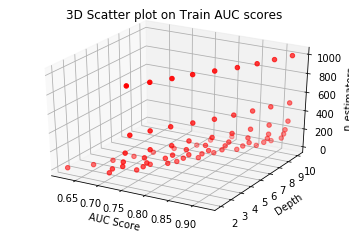

In [135]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()

In [136]:
gs.cv_results_

{'mean_fit_time': array([ 0.10730672,  0.27795307,  0.4920752 ,  0.70988552,  0.94027162,
         1.37299554,  2.22590407,  4.38128575,  0.10141945,  0.31458227,
         0.56633878,  0.82869252,  1.08785629,  1.59666451,  2.66094605,
         5.25266202,  0.11657818,  0.35999942,  0.68160033,  0.95723494,
         1.27223523,  1.89552673,  3.10947053,  6.32561278,  0.13127065,
         0.4297742 ,  0.79475737,  1.17924476,  1.59764004,  2.25806729,
         3.81356454,  7.44476151,  0.1353058 ,  0.49965668,  0.94490242,
         1.37959313,  1.8296059 ,  2.6840121 ,  4.41460347,  9.06667304,
         0.16016078,  0.58060225,  1.09040642,  1.67294518,  2.20483851,
         3.11990356,  5.16865015, 10.25351111,  0.17527731,  0.66968489,
         1.23025513,  1.86094189,  2.38742908,  3.62667084,  5.97094798,
        11.84175976,  0.1915435 ,  0.7564342 ,  1.40529331,  2.15697153,
         2.81129821,  4.18105618,  6.90993555, 13.89713216,  0.21022503,
         0.84958553,  1.65975849, 

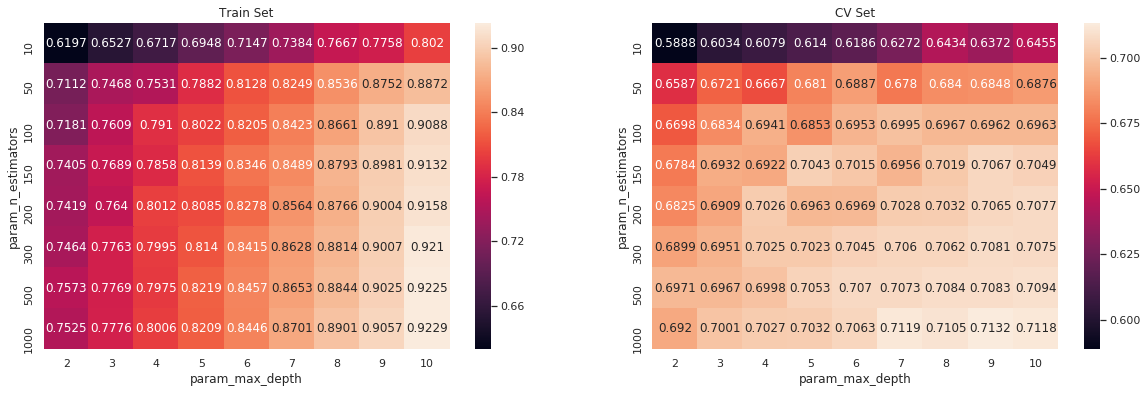

In [137]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [138]:
gs_results.best_params_

{'max_depth': 9, 'n_estimators': 1000}

In [0]:
max_d = gs_results.best_params_['max_depth']
n_est = gs_results.best_params_['n_estimators']

In [0]:
def pred_prob(clf, data): 
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

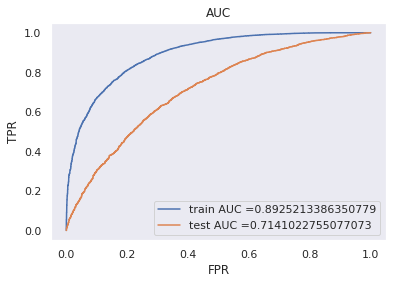

In [141]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = max_d, n_estimators = n_est)

model.fit(X_train,y_train)
    
y_train_pred = pred_prob(model,X_train)
y_test_pred = pred_prob(model,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [0]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [143]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6489888795417483 for threshold 0.84
Train confusion matrix
[[ 2493   602]
 [ 3304 13701]]


Train data confusion matrix


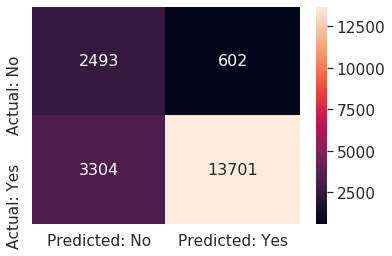

In [144]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [145]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 969  556]
 [2668 5707]]


Test data confusion matrix


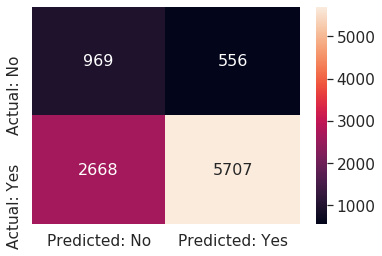

In [146]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### <font color='red'> SET 2</font> categorical (with response coding), numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)

In [0]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((cat_0_train_normalized, cat_1_train_normalized, subcat_0_train_normalized, subcat_1_train_normalized, state_0_train_normalized, state_1_train_normalized, grade_0_train_normalized, grade_1_train_normalized, prefix_0_train_normalized, prefix_1_train_normalized, price_normalized_train, quantity_normalized_train, previously_posted_projects_normalized_train, title_word_count_normalized_train, essay_word_count_normalized_train, sent_pos_train, sent_neg_train, sent_neu_train, sent_compound_train, train_title_tfidf, train_essay_tfidf)).tocsr()
X_test =  hstack((cat_0_test_normalized, cat_1_test_normalized, subcat_0_test_normalized, subcat_1_test_normalized, state_0_test_normalized, state_1_test_normalized, grade_0_test_normalized, grade_1_test_normalized, prefix_0_test_normalized, prefix_1_test_normalized, price_normalized_test, quantity_normalized_test, previously_posted_projects_normalized_test, title_word_count_normalized_test, essay_word_count_normalized_test, sent_pos_test, sent_neg_test, sent_neu_test, sent_compound_test, test_title_tfidf, test_essay_tfidf)).tocsr()

In [148]:
print(X_train.shape)
print(X_test.shape)

(20100, 9516)
(9900, 9516)


In [152]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

grid_params = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
gs = GridSearchCV(rf, grid_params, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True)
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.6963252641049676
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'max_depth': 9, 'n_estimators': 1000}


In [153]:
#Output of GridSearchCV
print('Best score: ',gs_results.best_score_)
print('k value with best score: ',gs_results.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.6963252641049676
k value with best score:  {'max_depth': 9, 'n_estimators': 1000}
Train AUC scores
[0.61677867 0.7122381  0.74094067 0.76218489 0.76608163 0.78234209
 0.78651346 0.79076986 0.6490126  0.73635837 0.76483742 0.78906211
 0.79742746 0.80761064 0.81476414 0.82299959 0.67594832 0.76932763
 0.79916522 0.8076891  0.81834405 0.83221149 0.83689881 0.84419568
 0.68031669 0.787986   0.81786065 0.82692914 0.84287273 0.85381373
 0.85610457 0.86280304 0.71173569 0.81365435 0.84330106 0.86284464
 0.8660914  0.87555254 0.88124344 0.88456929 0.71405107 0.8372557
 0.86880691 0.87512642 0.88881704 0.8892486  0.89382451 0.90482973
 0.72588455 0.8544873  0.88902836 0.90169671 0.90239734 0.91186362
 0.91648398 0.9219205  0.75350439 0.87642947 0.90752149 0.91260333
 0.92189626 0.92381083 0.92786558 0.93439443 0.75126437 0.8881536
 0.91607283 0.92671765 0.93277017 0.93872555 0.94426418 0.94494713]
CV AUC scores
[0.57935004 0.64584145 0.65605736 0.66736477 0.66345019 0.68310108
 0

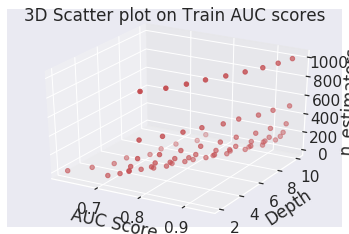

In [154]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()

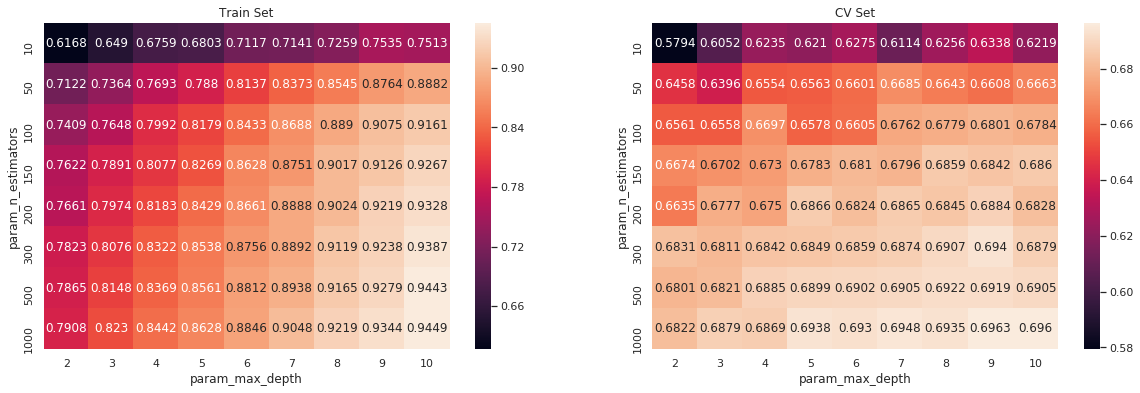

In [155]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

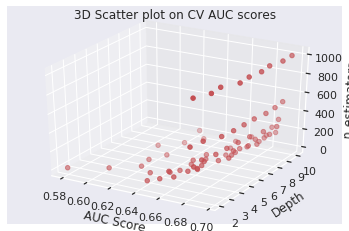

In [156]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_test_score'])    #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators




ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on CV AUC scores')
plt.show()

In [157]:
gs_results.best_params_

{'max_depth': 9, 'n_estimators': 1000}

In [0]:
max_d = gs_results.best_params_['max_depth']
n_est = gs_results.best_params_['n_estimators']

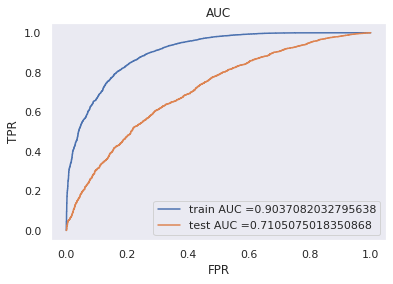

In [159]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = max_d, n_estimators = n_est)

model.fit(X_train,y_train)
    
y_train_pred = pred_prob(model,X_train)
y_test_pred = pred_prob(model,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [160]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6708223324984242 for threshold 0.84
Train confusion matrix
[[ 2454   641]
 [ 2618 14387]]


Train data confusion matrix


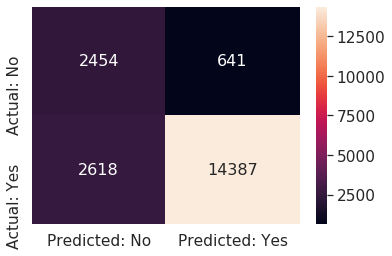

In [161]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [162]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 835  690]
 [2133 6242]]


Test data confusion matrix


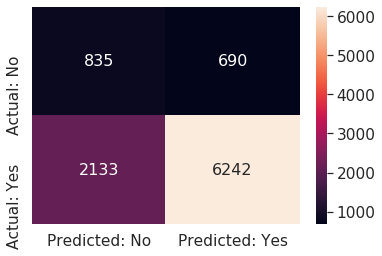

In [163]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [0]:
train_avg_w2v_essays_np = np.array(train_avg_w2v_essays)
train_avg_w2v_titles_np = np.array(train_avg_w2v_titles)
test_avg_w2v_essays_np  = np.array(test_avg_w2v_essays)
test_avg_w2v_titles_np  = np.array(test_avg_w2v_titles)

In [165]:
print(cat_0_train_normalized.shape)
print(cat_1_train_normalized.shape)
print(subcat_0_train_normalized.shape)
print(subcat_1_train_normalized.shape)
print(state_0_train_normalized.shape)
print(state_1_train_normalized.shape)
print(grade_0_train_normalized.shape)
print(grade_1_train_normalized.shape)
print(prefix_0_train_normalized.shape)
print(prefix_1_train_normalized.shape)
print(price_normalized_train.shape)
print(quantity_normalized_train.shape)
print(previously_posted_projects_normalized_train.shape)
print(title_word_count_normalized_train.shape)
print(essay_word_count_normalized_train.shape)
print(sent_pos_train.shape)
print(sent_neg_train.shape)
print(sent_neu_train.shape)
print(sent_compound_train.shape)
print(train_avg_w2v_essays_np.shape)
print(train_avg_w2v_titles_np.shape)

(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 1)
(20100, 300)
(20100, 300)


In [0]:
#https://blog.csdn.net/w55100/article/details/90369779
# if you use hstack without converting it into to a sparse matrix first,
#it shows an error: blocks must be 2-D

from scipy.sparse import coo_matrix, hstack 
tr1 = coo_matrix(cat_0_train_normalized)
tr2 = coo_matrix(cat_1_train_normalized)
tr3 = coo_matrix(subcat_0_train_normalized)
tr4 = coo_matrix(subcat_1_train_normalized)
tr5 = coo_matrix(state_0_train_normalized)
tr6 = coo_matrix(state_1_train_normalized)
tr7 = coo_matrix(grade_0_train_normalized)
tr8 = coo_matrix(grade_1_train_normalized)
tr9 = coo_matrix(prefix_0_train_normalized)
tr10 = coo_matrix(prefix_1_train_normalized)
tr11 = coo_matrix(price_normalized_train)
tr12 = coo_matrix(quantity_normalized_train)
tr13 = coo_matrix(previously_posted_projects_normalized_train)
tr14 = coo_matrix(title_word_count_normalized_train)
tr15 = coo_matrix(essay_word_count_normalized_train)
tr16 = coo_matrix(sent_pos_train)
tr17 = coo_matrix(sent_neg_train)
tr18 = coo_matrix(sent_neu_train)
tr19 = coo_matrix(sent_compound_train)
tr20 = coo_matrix(train_avg_w2v_essays_np)
tr21 = coo_matrix(train_avg_w2v_titles_np)



In [0]:
X_train = hstack([tr1,tr2,tr3,tr4,tr5,tr6,tr7,tr8,tr9,tr10,tr11,tr12,tr13,tr14,tr15,tr16,tr17,tr18,tr19,tr20,tr21]).tocsr()

In [0]:
te1 = coo_matrix(cat_0_test_normalized)
te2 = coo_matrix(cat_1_test_normalized)
te3 = coo_matrix(subcat_0_test_normalized)
te4 = coo_matrix(subcat_1_test_normalized)
te5 = coo_matrix(state_0_test_normalized)
te6 = coo_matrix(state_1_test_normalized)
te7 = coo_matrix(grade_0_test_normalized)
te8 = coo_matrix(grade_1_test_normalized)
te9 = coo_matrix(prefix_0_test_normalized)
te10 = coo_matrix(prefix_1_test_normalized)
te11 = coo_matrix(price_normalized_test)
te12 = coo_matrix(quantity_normalized_test)
te13 = coo_matrix(previously_posted_projects_normalized_test)
te14 = coo_matrix(title_word_count_normalized_test)
te15 = coo_matrix(essay_word_count_normalized_test)
te16 = coo_matrix(sent_pos_test)
te17 = coo_matrix(sent_neg_test)
te18 = coo_matrix(sent_neu_test)
te19 = coo_matrix(sent_compound_test)
te20 = coo_matrix(test_avg_w2v_essays_np)
te21 = coo_matrix(test_avg_w2v_titles_np)

In [0]:
X_test = hstack([te1,te2,te3,te4,te5,te6,te7,te8,te9,te10,te11,te12,te13,te14,te15,te16,te17,te18,te19,te20,te21]).tocsr()


In [170]:
print(X_train.shape)
print(X_test.shape)


(20100, 619)
(9900, 619)


In [171]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

grid_params = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
rs = RandomizedSearchCV(rf,grid_params ,cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True)
rs.fit(X_train, y_train)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [172]:
print('Best score: ',rs.best_score_)
print('k value with best score: ',rs.best_params_)
print('='*75)
print('Train AUC scores')
print(rs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(rs.cv_results_['mean_test_score'])

Best score:  0.6958344814738235
k value with best score:  {'n_estimators': 1000, 'max_depth': 7}
Train AUC scores
[0.72973238 0.75558022 0.9338576  0.96223154 0.88420485 0.72862269
 0.86607493 0.99031803 0.92274474 0.79995046]
CV AUC scores
[0.68545908 0.63935916 0.69583448 0.69286449 0.69113485 0.68117059
 0.67901794 0.68199784 0.68957848 0.69352643]


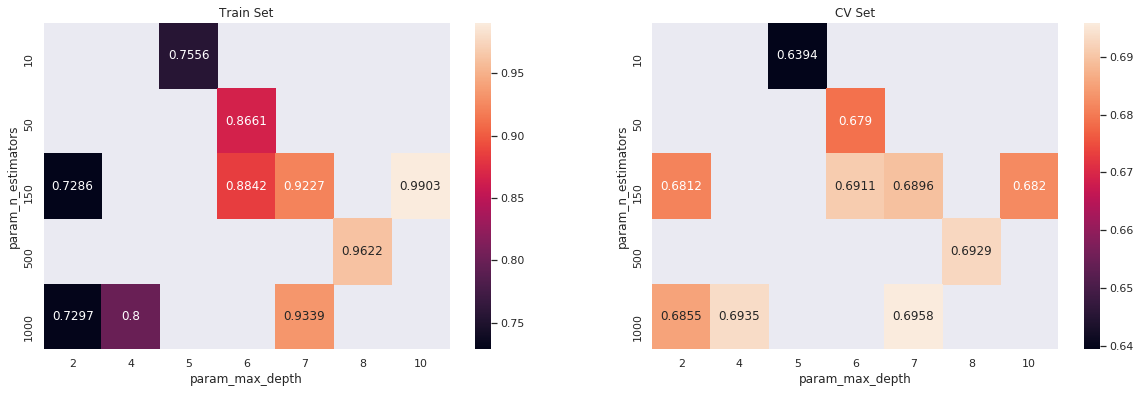

In [173]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(rs.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
max_d = rs.best_params_['max_depth']
n_est = rs.best_params_['n_estimators']

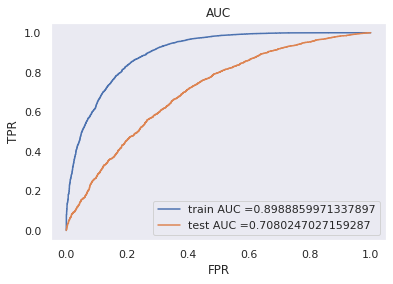

In [175]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = max_d, n_estimators = n_est)

model.fit(X_train,y_train)
    
y_train_pred = pred_prob(model,X_train)
y_test_pred = pred_prob(model,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [176]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6704904715376405 for threshold 0.832
Train confusion matrix
[[ 2433   662]
 [ 2501 14504]]


Train data confusion matrix


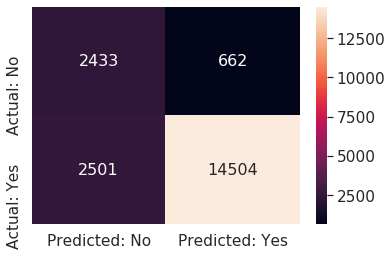

In [177]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [178]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 910  615]
 [2352 6023]]


Test data confusion matrix


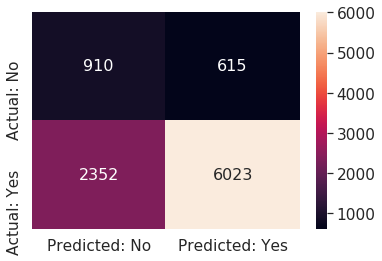

In [179]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
train_tfidf_w2v_essays_np = np.array(train_tfidf_w2v_essays)
train_tfidf_w2v_titles_np = np.array(train_tfidf_w2v_titles)
test_tfidf_w2v_essays_np  = np.array(test_tfidf_w2v_essays)
test_tfidf_w2v_titles_np  = np.array(test_tfidf_w2v_titles)

In [0]:
#https://blog.csdn.net/w55100/article/details/90369779
# if you use hstack without converting it into to a sparse matrix first,
#it shows an error: blocks must be 2-D

from scipy.sparse import coo_matrix, hstack 
tr1 = coo_matrix(cat_0_train_normalized)
tr2 = coo_matrix(cat_1_train_normalized)
tr3 = coo_matrix(subcat_0_train_normalized)
tr4 = coo_matrix(subcat_1_train_normalized)
tr5 = coo_matrix(state_0_train_normalized)
tr6 = coo_matrix(state_1_train_normalized)
tr7 = coo_matrix(grade_0_train_normalized)
tr8 = coo_matrix(grade_1_train_normalized)
tr9 = coo_matrix(prefix_0_train_normalized)
tr10 = coo_matrix(prefix_1_train_normalized)
tr11 = coo_matrix(price_normalized_train)
tr12 = coo_matrix(quantity_normalized_train)
tr13 = coo_matrix(previously_posted_projects_normalized_train)
tr14 = coo_matrix(title_word_count_normalized_train)
tr15 = coo_matrix(essay_word_count_normalized_train)
tr16 = coo_matrix(sent_pos_train)
tr17 = coo_matrix(sent_neg_train)
tr18 = coo_matrix(sent_neu_train)
tr19 = coo_matrix(sent_compound_train)
tr20 = coo_matrix(train_tfidf_w2v_essays_np)
tr21 = coo_matrix(train_tfidf_w2v_titles_np)



In [0]:
X_train = hstack([tr1,tr2,tr3,tr4,tr5,tr6,tr7,tr8,tr9,tr10,tr11,tr12,tr13,tr14,tr15,tr16,tr17,tr18,tr19,tr20,tr21]).tocsr()

In [0]:
te1 = coo_matrix(cat_0_test_normalized)
te2 = coo_matrix(cat_1_test_normalized)
te3 = coo_matrix(subcat_0_test_normalized)
te4 = coo_matrix(subcat_1_test_normalized)
te5 = coo_matrix(state_0_test_normalized)
te6 = coo_matrix(state_1_test_normalized)
te7 = coo_matrix(grade_0_test_normalized)
te8 = coo_matrix(grade_1_test_normalized)
te9 = coo_matrix(prefix_0_test_normalized)
te10 = coo_matrix(prefix_1_test_normalized)
te11 = coo_matrix(price_normalized_test)
te12 = coo_matrix(quantity_normalized_test)
te13 = coo_matrix(previously_posted_projects_normalized_test)
te14 = coo_matrix(title_word_count_normalized_test)
te15 = coo_matrix(essay_word_count_normalized_test)
te16 = coo_matrix(sent_pos_test)
te17 = coo_matrix(sent_neg_test)
te18 = coo_matrix(sent_neu_test)
te19 = coo_matrix(sent_compound_test)
te20 = coo_matrix(test_tfidf_w2v_essays_np)
te21 = coo_matrix(test_tfidf_w2v_titles_np)

In [0]:

X_test = hstack([te1,te2,te3,te4,te5,te6,te7,te8,te9,te10,te11,te12,te13,te14,te15,te16,te17,te18,te19,te20,te21]).tocsr()


In [185]:
print(X_train.shape)
print(X_test.shape)

(20100, 619)
(9900, 619)


In [186]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

grid_params = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
rs = RandomizedSearchCV(rf,grid_params ,cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True)
rs.fit(X_train, y_train)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [187]:
print('Best score: ',rs.best_score_)
print('k value with best score: ',rs.best_params_)
print('='*75)
print('Train AUC scores')
print(rs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(rs.cv_results_['mean_test_score'])

Best score:  0.7030672667359812
k value with best score:  {'n_estimators': 1000, 'max_depth': 7}
Train AUC scores
[0.82433106 0.93237877 0.88948088 0.95986049 0.99256362 0.76352589
 0.92770039 0.75733928 0.69668132 0.99439491]
CV AUC scores
[0.69145487 0.70306727 0.70281972 0.69378013 0.69077295 0.69772586
 0.6204351  0.69221983 0.65261872 0.69314499]


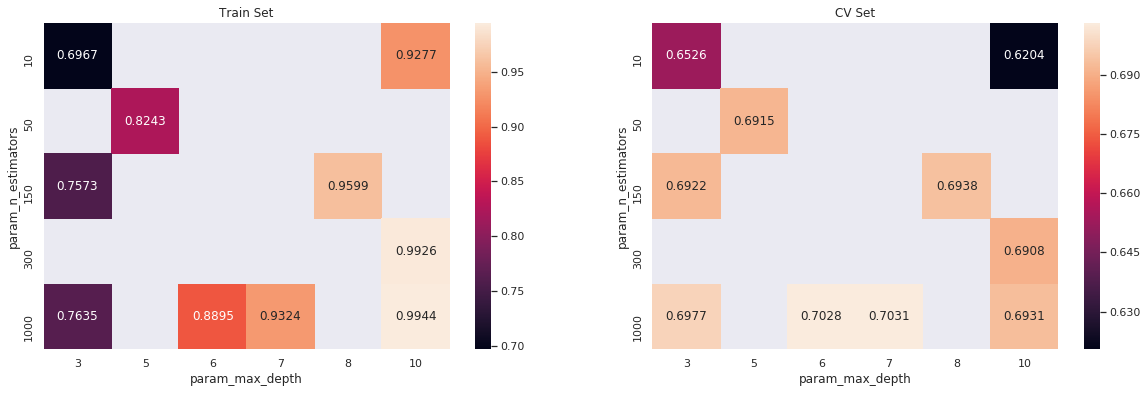

In [188]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(rs.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
max_d = rs.best_params_['max_depth']
n_est = rs.best_params_['n_estimators']

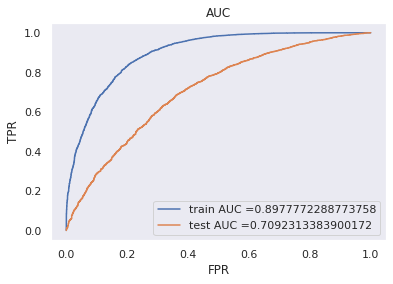

In [190]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = max_d, n_estimators = n_est)

model.fit(X_train,y_train)
    
y_train_pred = pred_prob(model,X_train)
y_test_pred = pred_prob(model,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [191]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6677600002660056 for threshold 0.828
Train confusion matrix
[[ 2434   661]
 [ 2566 14439]]


Train data confusion matrix


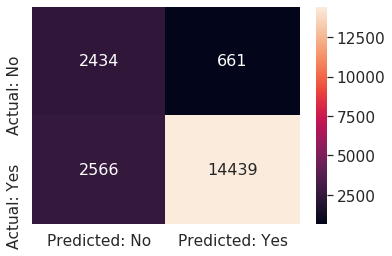

In [192]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [193]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 952  573]
 [2537 5838]]


Test data confusion matrix


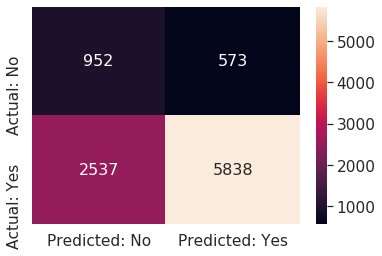

In [194]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [0]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((cat_0_train_normalized, cat_1_train_normalized, subcat_0_train_normalized, subcat_1_train_normalized, state_0_train_normalized, state_1_train_normalized, grade_0_train_normalized, grade_1_train_normalized, prefix_0_train_normalized, prefix_1_train_normalized, price_normalized_train, quantity_normalized_train, previously_posted_projects_normalized_train, title_word_count_normalized_train, essay_word_count_normalized_train, sent_pos_train, sent_neg_train, sent_neu_train, sent_compound_train, train_title_bow, train_essay_bow)).tocsr()
X_test =  hstack((cat_0_test_normalized, cat_1_test_normalized, subcat_0_test_normalized, subcat_1_test_normalized, state_0_test_normalized, state_1_test_normalized, grade_0_test_normalized, grade_1_test_normalized, prefix_0_test_normalized, prefix_1_test_normalized, price_normalized_test, quantity_normalized_test, previously_posted_projects_normalized_test, title_word_count_normalized_test, essay_word_count_normalized_test, sent_pos_test, sent_neg_test, sent_neu_test, sent_compound_test, test_title_bow, test_essay_bow)).tocsr()

In [196]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

gbdt = XGBClassifier()

grid_params = {'n_estimators': [5, 10, 15, 20, 25, 30, 35], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
rs = RandomizedSearchCV(gbdt,grid_params ,cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True)
rs.fit(X_train, y_train)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [197]:
print('Best score: ',rs.best_score_)
print('k value with best score: ',rs.best_params_)
print('='*75)
print('Train AUC scores')
print(rs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(rs.cv_results_['mean_test_score'])

Best score:  0.7224656227341516
k value with best score:  {'n_estimators': 35, 'max_depth': 7}
Train AUC scores
[0.66671989 0.87993254 0.80686491 0.93056107 0.97964675 0.70435178
 0.93931421 0.92721036 0.9850908  0.95073755]
CV AUC scores
[0.64617362 0.68580412 0.70622284 0.68162801 0.7125986  0.68314819
 0.71675846 0.72246562 0.71728043 0.70894379]


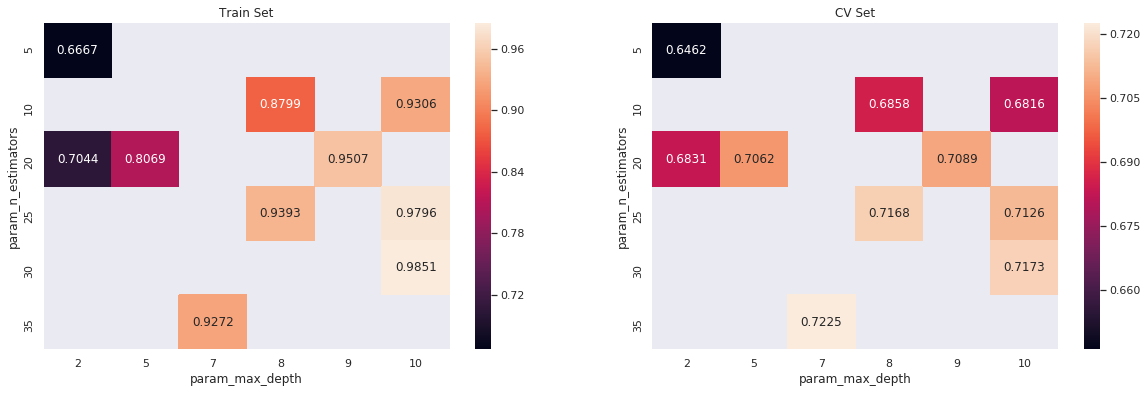

In [198]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(rs.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
max_d = rs.best_params_['max_depth']
n_est = rs.best_params_['n_estimators']

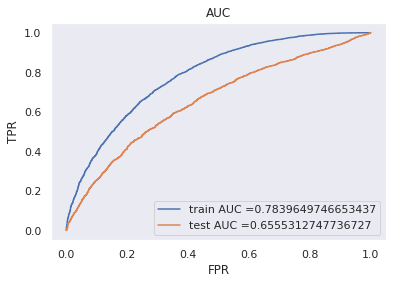

In [200]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = max_d, n_estimators = n_est)

model.fit(X_train,y_train)
    
y_train_pred = pred_prob(model,X_train)
y_test_pred = pred_prob(model,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [201]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5026807187280753 for threshold 0.842
Train confusion matrix
[[ 2191   904]
 [ 4930 12075]]


Train data confusion matrix


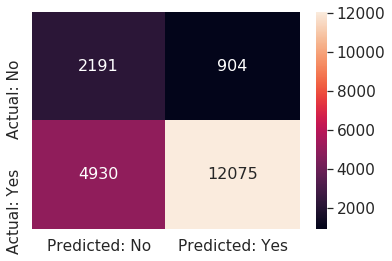

In [202]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [203]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 672  853]
 [1978 6397]]


Test data confusion matrix


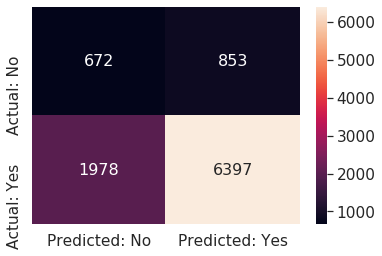

In [204]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((cat_0_train_normalized, cat_1_train_normalized, subcat_0_train_normalized, subcat_1_train_normalized, state_0_train_normalized, state_1_train_normalized, grade_0_train_normalized, grade_1_train_normalized, prefix_0_train_normalized, prefix_1_train_normalized, price_normalized_train, quantity_normalized_train, previously_posted_projects_normalized_train, title_word_count_normalized_train, essay_word_count_normalized_train, sent_pos_train, sent_neg_train, sent_neu_train, sent_compound_train, train_title_tfidf, train_essay_tfidf)).tocsr()
X_test =  hstack((cat_0_test_normalized, cat_1_test_normalized, subcat_0_test_normalized, subcat_1_test_normalized, state_0_test_normalized, state_1_test_normalized, grade_0_test_normalized, grade_1_test_normalized, prefix_0_test_normalized, prefix_1_test_normalized, price_normalized_test, quantity_normalized_test, previously_posted_projects_normalized_test, title_word_count_normalized_test, essay_word_count_normalized_test, sent_pos_test, sent_neg_test, sent_neu_test, sent_compound_test, test_title_tfidf, test_essay_tfidf)).tocsr()


In [206]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

gbdt = XGBClassifier()

grid_params = {'n_estimators': [5, 10, 15, 20, 25, 30, 35], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
gs = GridSearchCV(gbdt,grid_params ,cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True)
gs.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35]},
             pre_dispatch='2*n

In [207]:
print('Best score: ',gs.best_score_)
print('k value with best score: ',gs.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.7218742581592476
k value with best score:  {'max_depth': 8, 'n_estimators': 35}
Train AUC scores
[0.66857266 0.68585384 0.69874443 0.70866975 0.71526946 0.72282196
 0.73104384 0.69024092 0.7140186  0.72689318 0.73832239 0.74981227
 0.76147949 0.77334283 0.71302453 0.74378841 0.76265276 0.77833098
 0.79461603 0.80887957 0.82081784 0.74806206 0.78341998 0.80727719
 0.82749786 0.8424464  0.8575041  0.86952897 0.77828171 0.81581703
 0.84826641 0.86652505 0.88363047 0.89714301 0.90874264 0.8086753
 0.85485564 0.8868493  0.90632622 0.92085253 0.93348911 0.94320957
 0.8298689  0.88939852 0.9186513  0.93487138 0.94941867 0.95984765
 0.96783049 0.85534691 0.90955808 0.9415098  0.95855569 0.97135203
 0.97810092 0.98362833 0.87367278 0.9345201  0.96209464 0.97590501
 0.98485613 0.9895416  0.9927766 ]
CV AUC scores
[0.64897532 0.66532694 0.67521816 0.68208349 0.68870916 0.69419
 0.69938642 0.6593254  0.67380733 0.6825165  0.68966361 0.69580853
 0.70249844 0.70819091 0.66878915 0.683

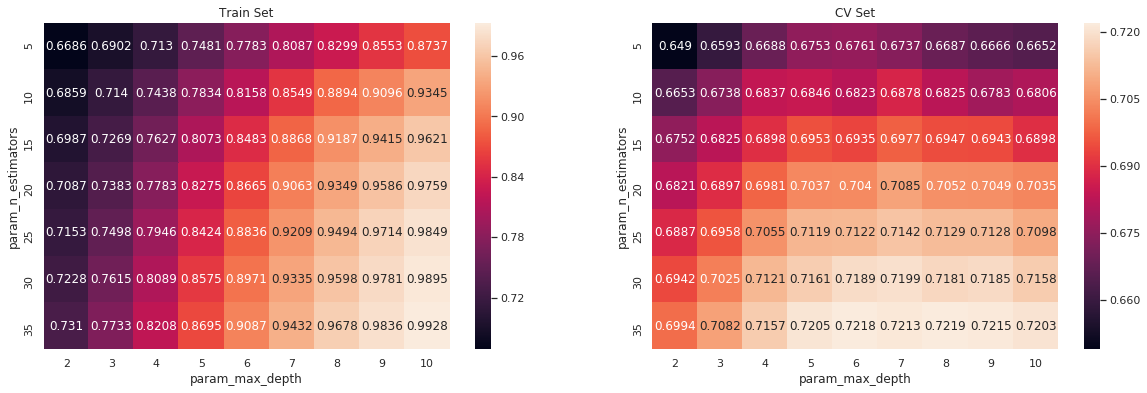

In [208]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
max_d = rs.best_params_['max_depth']
n_est = rs.best_params_['n_estimators']

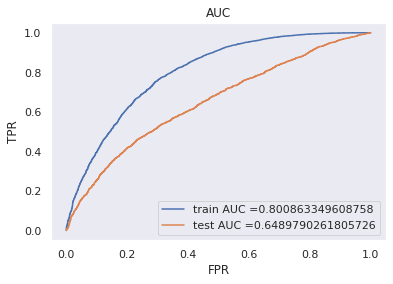

In [210]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = max_d, n_estimators = n_est)

model.fit(X_train,y_train)
    
y_train_pred = pred_prob(model,X_train)
y_test_pred = pred_prob(model,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [211]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5324213205371982 for threshold 0.843
Train confusion matrix
[[ 2157   938]
 [ 4014 12991]]


Train data confusion matrix


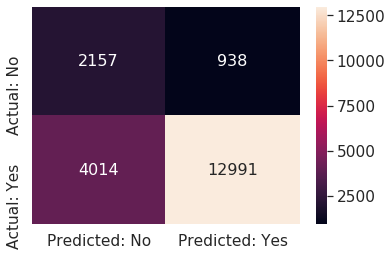

In [212]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [213]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 841  684]
 [2932 5443]]


Test data confusion matrix


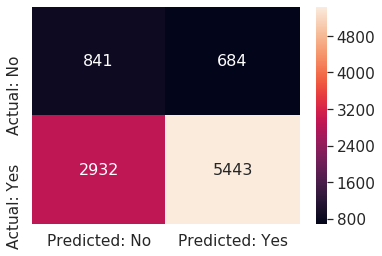

In [214]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [0]:
# Please write all the code with proper documentation
train_avg_w2v_essays_np = np.array(train_avg_w2v_essays)
train_avg_w2v_titles_np = np.array(train_avg_w2v_titles)
test_avg_w2v_essays_np  = np.array(test_avg_w2v_essays)
test_avg_w2v_titles_np  = np.array(test_avg_w2v_titles)

In [0]:
#https://blog.csdn.net/w55100/article/details/90369779
# if you use hstack without converting it into to a sparse matrix first,
#it shows an error: blocks must be 2-D

from scipy.sparse import coo_matrix, hstack 
tr1 = coo_matrix(cat_0_train_normalized)
tr2 = coo_matrix(cat_1_train_normalized)
tr3 = coo_matrix(subcat_0_train_normalized)
tr4 = coo_matrix(subcat_1_train_normalized)
tr5 = coo_matrix(state_0_train_normalized)
tr6 = coo_matrix(state_1_train_normalized)
tr7 = coo_matrix(grade_0_train_normalized)
tr8 = coo_matrix(grade_1_train_normalized)
tr9 = coo_matrix(prefix_0_train_normalized)
tr10 = coo_matrix(prefix_1_train_normalized)
tr11 = coo_matrix(price_normalized_train)
tr12 = coo_matrix(quantity_normalized_train)
tr13 = coo_matrix(previously_posted_projects_normalized_train)
tr14 = coo_matrix(title_word_count_normalized_train)
tr15 = coo_matrix(essay_word_count_normalized_train)
tr16 = coo_matrix(sent_pos_train)
tr17 = coo_matrix(sent_neg_train)
tr18 = coo_matrix(sent_neu_train)
tr19 = coo_matrix(sent_compound_train)
tr20 = coo_matrix(train_avg_w2v_essays_np)
tr21 = coo_matrix(train_avg_w2v_titles_np)



In [0]:
X_train = hstack([tr1,tr2,tr3,tr4,tr5,tr6,tr7,tr8,tr9,tr10,tr11,tr12,tr13,tr14,tr15,tr16,tr17,tr18,tr19,tr20,tr21]).tocsr()

In [0]:
te1 = coo_matrix(cat_0_test_normalized)
te2 = coo_matrix(cat_1_test_normalized)
te3 = coo_matrix(subcat_0_test_normalized)
te4 = coo_matrix(subcat_1_test_normalized)
te5 = coo_matrix(state_0_test_normalized)
te6 = coo_matrix(state_1_test_normalized)
te7 = coo_matrix(grade_0_test_normalized)
te8 = coo_matrix(grade_1_test_normalized)
te9 = coo_matrix(prefix_0_test_normalized)
te10 = coo_matrix(prefix_1_test_normalized)
te11 = coo_matrix(price_normalized_test)
te12 = coo_matrix(quantity_normalized_test)
te13 = coo_matrix(previously_posted_projects_normalized_test)
te14 = coo_matrix(title_word_count_normalized_test)
te15 = coo_matrix(essay_word_count_normalized_test)
te16 = coo_matrix(sent_pos_test)
te17 = coo_matrix(sent_neg_test)
te18 = coo_matrix(sent_neu_test)
te19 = coo_matrix(sent_compound_test)
te20 = coo_matrix(test_avg_w2v_essays_np)
te21 = coo_matrix(test_avg_w2v_titles_np)

In [0]:
X_test = hstack([te1,te2,te3,te4,te5,te6,te7,te8,te9,te10,te11,te12,te13,te14,te15,te16,te17,te18,te19,te20,te21]).tocsr()


In [220]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

gbdt = XGBClassifier()

grid_params = {'n_estimators': [5, 10, 15, 20, 25, 30, 35], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
rs = RandomizedSearchCV(gbdt,grid_params ,cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True)
rs.fit(X_train, y_train)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [221]:
print('Best score: ',rs.best_score_)
print('k value with best score: ',rs.best_params_)
print('='*75)
print('Train AUC scores')
print(rs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(rs.cv_results_['mean_test_score'])

Best score:  0.7215894718873592
k value with best score:  {'n_estimators': 30, 'max_depth': 6}
Train AUC scores
[0.87266231 0.99697    0.70198026 0.77964604 0.92282842 0.85849516
 0.93921288 0.66522938 0.82894018 0.97954267]
CV AUC scores
[0.71510919 0.71837512 0.66254084 0.71207049 0.71659669 0.69170919
 0.72158947 0.64316483 0.71966987 0.6799085 ]


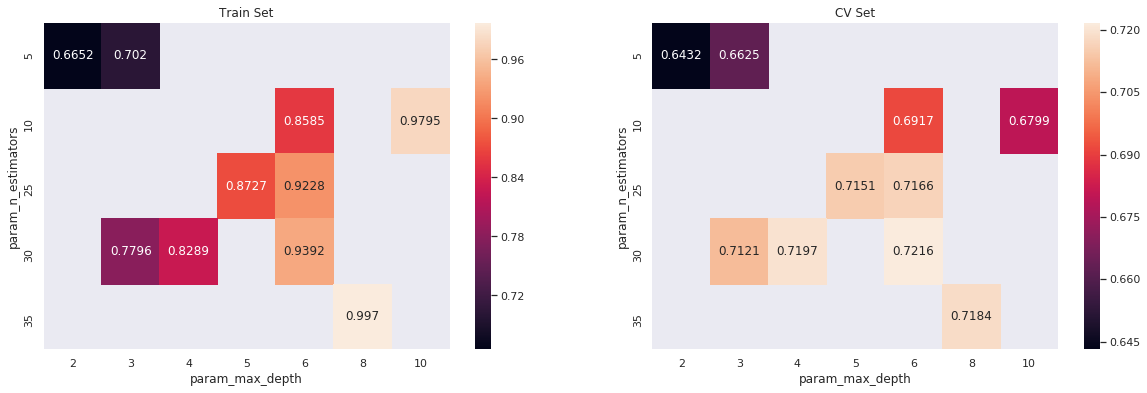

In [222]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(rs.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [223]:
rs.best_params_

{'max_depth': 6, 'n_estimators': 30}

In [0]:
max_d = rs.best_params_['max_depth']
n_est = rs.best_params_['n_estimators']

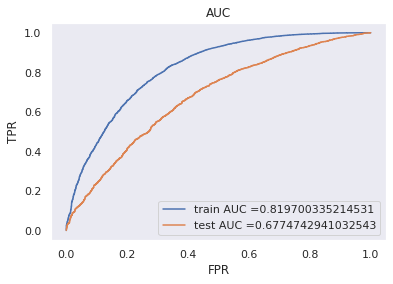

In [225]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = max_d, n_estimators = n_est)

model.fit(X_train,y_train)
    
y_train_pred = pred_prob(model,X_train)
y_test_pred = pred_prob(model,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [226]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5521807659915666 for threshold 0.836
Train confusion matrix
[[ 2192   903]
 [ 3747 13258]]


Train data confusion matrix


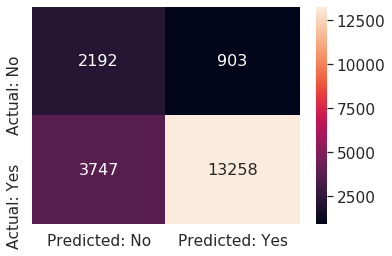

In [227]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [228]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 934  591]
 [2879 5496]]


Test data confusion matrix


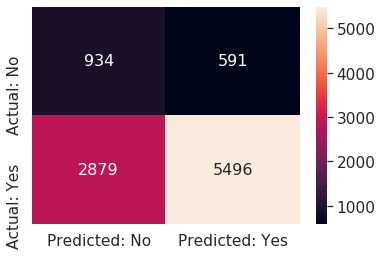

In [229]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation
train_tfidf_w2v_essays_np = np.array(train_tfidf_w2v_essays)
train_tfidf_w2v_titles_np = np.array(train_tfidf_w2v_titles)
test_tfidf_w2v_essays_np  = np.array(test_tfidf_w2v_essays)
test_tfidf_w2v_titles_np  = np.array(test_tfidf_w2v_titles)

In [0]:
#https://blog.csdn.net/w55100/article/details/90369779
# if you use hstack without converting it into to a sparse matrix first,
#it shows an error: blocks must be 2-D

from scipy.sparse import coo_matrix, hstack 
tr1 = coo_matrix(cat_0_train_normalized)
tr2 = coo_matrix(cat_1_train_normalized)
tr3 = coo_matrix(subcat_0_train_normalized)
tr4 = coo_matrix(subcat_1_train_normalized)
tr5 = coo_matrix(state_0_train_normalized)
tr6 = coo_matrix(state_1_train_normalized)
tr7 = coo_matrix(grade_0_train_normalized)
tr8 = coo_matrix(grade_1_train_normalized)
tr9 = coo_matrix(prefix_0_train_normalized)
tr10 = coo_matrix(prefix_1_train_normalized)
tr11 = coo_matrix(price_normalized_train)
tr12 = coo_matrix(quantity_normalized_train)
tr13 = coo_matrix(previously_posted_projects_normalized_train)
tr14 = coo_matrix(title_word_count_normalized_train)
tr15 = coo_matrix(essay_word_count_normalized_train)
tr16 = coo_matrix(sent_pos_train)
tr17 = coo_matrix(sent_neg_train)
tr18 = coo_matrix(sent_neu_train)
tr19 = coo_matrix(sent_compound_train)
tr20 = coo_matrix(train_tfidf_w2v_essays_np)
tr21 = coo_matrix(train_tfidf_w2v_titles_np)

In [0]:
X_train = hstack([tr1,tr2,tr3,tr4,tr5,tr6,tr7,tr8,tr9,tr10,tr11,tr12,tr13,tr14,tr15,tr16,tr17,tr18,tr19,tr20,tr21]).tocsr()

In [0]:
te1 = coo_matrix(cat_0_test_normalized)
te2 = coo_matrix(cat_1_test_normalized)
te3 = coo_matrix(subcat_0_test_normalized)
te4 = coo_matrix(subcat_1_test_normalized)
te5 = coo_matrix(state_0_test_normalized)
te6 = coo_matrix(state_1_test_normalized)
te7 = coo_matrix(grade_0_test_normalized)
te8 = coo_matrix(grade_1_test_normalized)
te9 = coo_matrix(prefix_0_test_normalized)
te10 = coo_matrix(prefix_1_test_normalized)
te11 = coo_matrix(price_normalized_test)
te12 = coo_matrix(quantity_normalized_test)
te13 = coo_matrix(previously_posted_projects_normalized_test)
te14 = coo_matrix(title_word_count_normalized_test)
te15 = coo_matrix(essay_word_count_normalized_test)
te16 = coo_matrix(sent_pos_test)
te17 = coo_matrix(sent_neg_test)
te18 = coo_matrix(sent_neu_test)
te19 = coo_matrix(sent_compound_test)
te20 = coo_matrix(test_tfidf_w2v_essays_np)
te21 = coo_matrix(test_tfidf_w2v_titles_np)

In [0]:
X_test = hstack([te1,te2,te3,te4,te5,te6,te7,te8,te9,te10,te11,te12,te13,te14,te15,te16,te17,te18,te19,te20,te21]).tocsr()


In [235]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

gbdt = XGBClassifier()

grid_params = {'n_estimators': [5, 10, 15, 20, 25, 30, 35], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
rs = RandomizedSearchCV(gbdt,grid_params ,cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True)
rs.fit(X_train, y_train)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [236]:
print('Best score: ',rs.best_score_)
print('k value with best score: ',rs.best_params_)
print('='*75)
print('Train AUC scores')
print(rs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(rs.cv_results_['mean_test_score'])

Best score:  0.725589730388709
k value with best score:  {'n_estimators': 35, 'max_depth': 5}
Train AUC scores
[0.99966909 0.71488734 0.81624348 0.89613305 0.82975511 0.86114728
 0.99921299 0.99997944 0.81542896 0.97164079]
CV AUC scores
[0.7170925  0.68497315 0.71791127 0.72558973 0.72326732 0.67503654
 0.71259468 0.7088266  0.70315761 0.69727265]


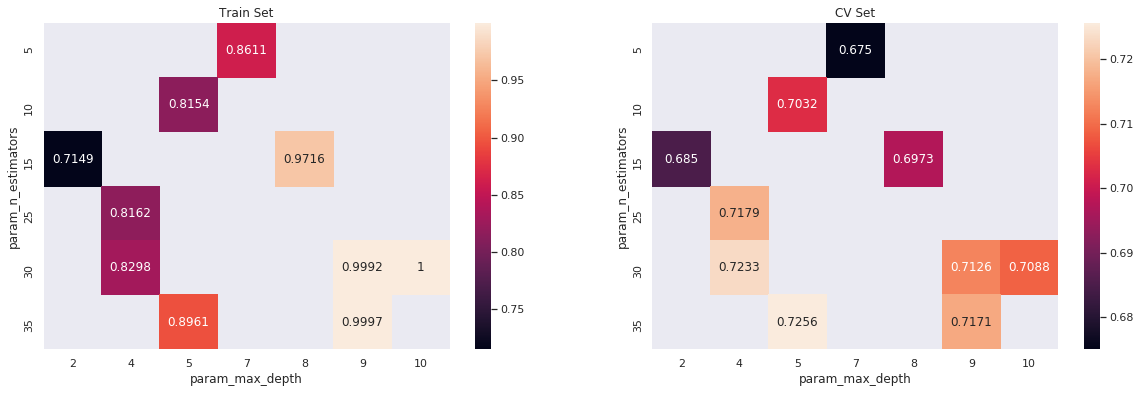

In [237]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(rs.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [238]:
rs.best_params_

{'max_depth': 5, 'n_estimators': 35}

In [0]:
max_d = rs.best_params_['max_depth']
n_est = rs.best_params_['n_estimators']

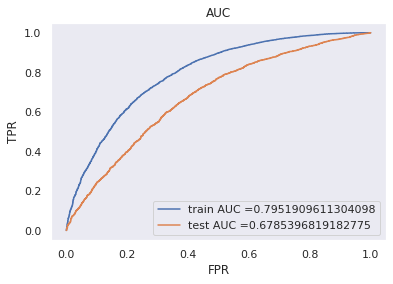

In [240]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = max_d, n_estimators = n_est)

model.fit(X_train,y_train)
    
y_train_pred = pred_prob(model,X_train)
y_test_pred = pred_prob(model,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [241]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5213102294820634 for threshold 0.838
Train confusion matrix
[[ 2237   858]
 [ 4740 12265]]


Train data confusion matrix


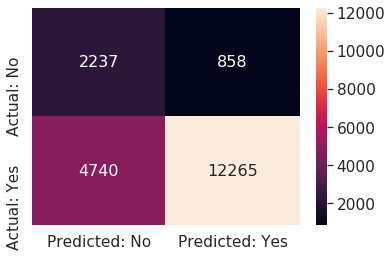

In [242]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [243]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 954  571]
 [2952 5423]]


Test data confusion matrix


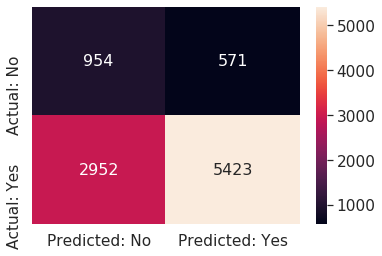

In [244]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusion</h1>

In [246]:
# Please compare all your models using Prettytable library

# Please compare all your models using Prettytable library

# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters(n_estimators,max_depth)", "Test AUC"]

x.add_row(["BOW", "RF","(1000, 9)", 0.7141])
x.add_row(["TFIDF", "RF", "(1000, 9)",  0.7105])
x.add_row(["AVG W2V", "RF", "(300, 7)",  0.7080])
x.add_row(["TFIDF W2V", "RF", "(200, 7)",  0.7092])

x.add_row(["----- ---", "----", "-------------------------------", "---------"])

x.add_row(["BOW", "GBDT","(35, 7)",  0.6553])
x.add_row(["TFIDF", "GBDT", "(35, 8)",  0.6489])
x.add_row(["AVG W2V", "GBDT", "(30, 6)",  0.6774])
x.add_row(["TFIDF W2V", "GBDT", "(35, 5)", 0.6753])



print(x)

+------------+-------+-----------------------------------------+-----------+
| Vectorizer | Model | Hyperparameters(n_estimators,max_depth) |  Test AUC |
+------------+-------+-----------------------------------------+-----------+
|    BOW     |   RF  |                (1000, 9)                |   0.7141  |
|   TFIDF    |   RF  |                (1000, 9)                |   0.7105  |
|  AVG W2V   |   RF  |                 (300, 7)                |   0.708   |
| TFIDF W2V  |   RF  |                 (200, 7)                |   0.7092  |
| ----- ---  |  ---- |     -------------------------------     | --------- |
|    BOW     |  GBDT |                 (35, 7)                 |   0.6553  |
|   TFIDF    |  GBDT |                 (35, 8)                 |   0.6489  |
|  AVG W2V   |  GBDT |                 (30, 6)                 |   0.6774  |
| TFIDF W2V  |  GBDT |                 (35, 5)                 |   0.6753  |
+------------+-------+-----------------------------------------+-----------+